# CSE1904 -  Capstone Project<br>CNN-Based Method for Classifying Cervical Cancer Cells in Pap Smear Images

#### Remita Austin
#### Reg No: 19BCE1637
#### Faculty Guide: Dr. Parvathi R

In [ ]:
#Import the required libraries
import cv2
import os
import shutil 
import math
import random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from skimage.color import rgb2gray
from skimage import io
from PIL import Image
import tensorflow as tf 
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import VGG19
from keras.applications.densenet import DenseNet201
from keras.applications.densenet import DenseNet121
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras import models, layers
from tensorflow.keras import Model
import glob
from tensorflow.keras.utils import load_img
from keras.regularizers import l2

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"remitaaustin","key":"ea6a1036a48b76c285eddd90e6a0e37d"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

## Working with the Herlev Dataset

In [ ]:
!kaggle datasets download bornarado/papsmeardatasets -p /content/sample_data/ --unzip

100% 6.43G/6.44G [01:07<00:00, 129MB/s]
100% 6.44G/6.44G [01:08<00:00, 102MB/s]



DIRECTORY:  abnormal_light_dysplastic
364
Image Count  364
BMP Path  182
d.dmp Path  182
./sample_data/herlev_pap_smear/abnormal_light_dysplastic/148499383-148499474-001.BMP


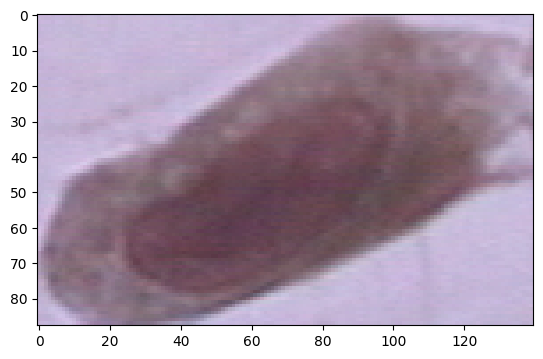

./sample_data/herlev_pap_smear/abnormal_light_dysplastic/148498683-148498703-001.BMP


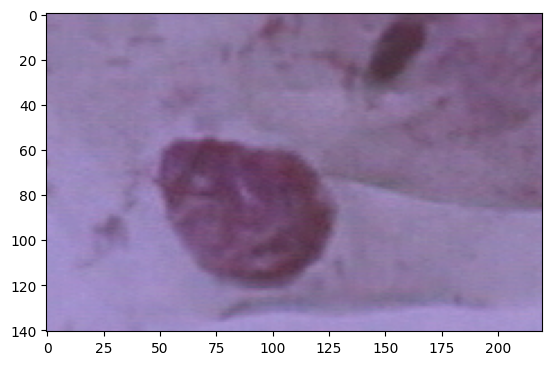

./sample_data/herlev_pap_smear/abnormal_light_dysplastic/148881729-148881744-001-d.bmp


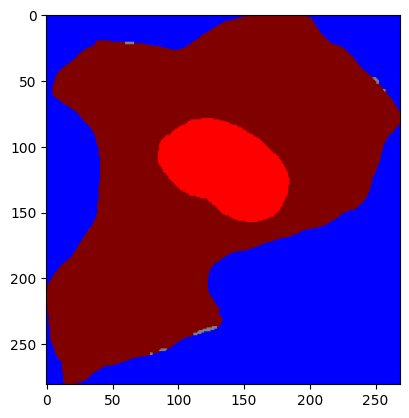

./sample_data/herlev_pap_smear/abnormal_light_dysplastic/148842055-148842064-001-d.bmp


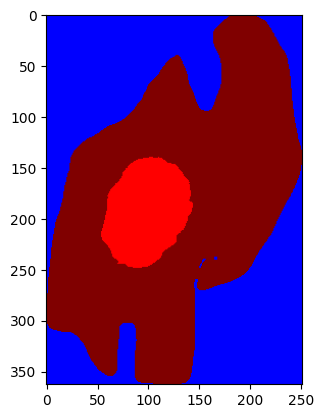


DIRECTORY:  normal_columnar
196
Image Count  196
BMP Path  98
d.dmp Path  98
./sample_data/herlev_pap_smear/normal_columnar/153958547-153958572-002.BMP


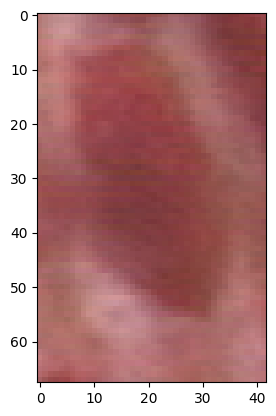

./sample_data/herlev_pap_smear/normal_columnar/153958345-153958364-001.BMP


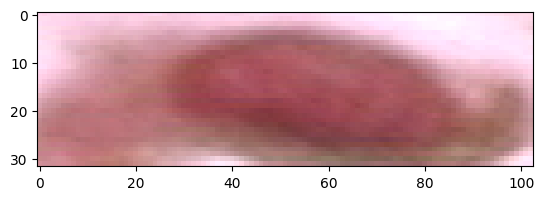

./sample_data/herlev_pap_smear/normal_columnar/157224172-157224207-002-d.bmp


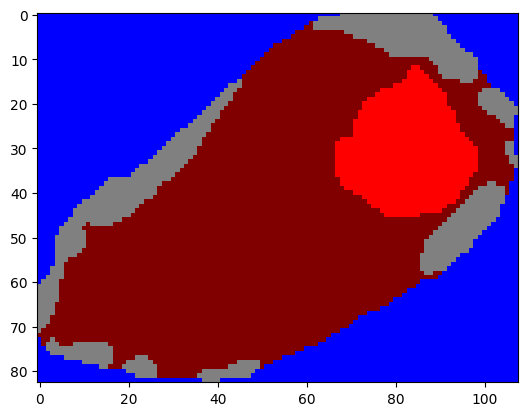

./sample_data/herlev_pap_smear/normal_columnar/153958547-153958572-006-d.bmp


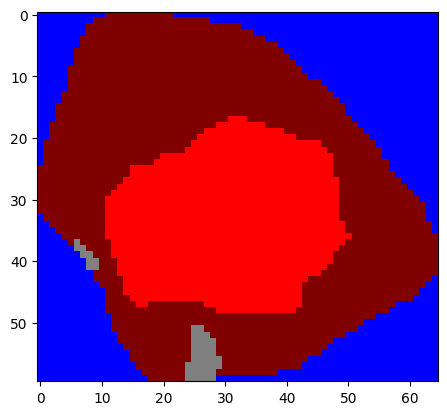


DIRECTORY:  abnormal_moderate_dysplastic
292
Image Count  292
BMP Path  146
d.dmp Path  146
./sample_data/herlev_pap_smear/abnormal_moderate_dysplastic/153829745-153829763-001.BMP


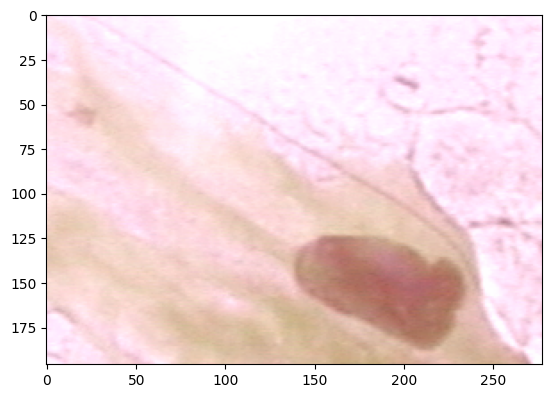

./sample_data/herlev_pap_smear/abnormal_moderate_dysplastic/149140081-149140096-002.BMP


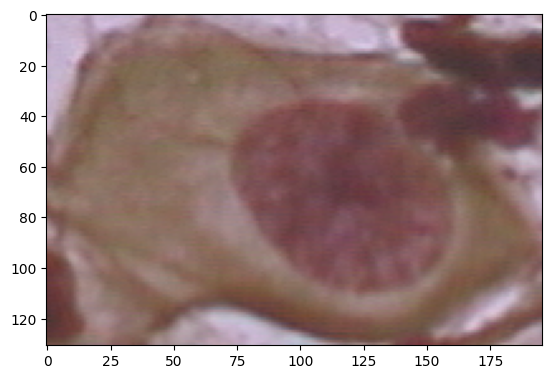

./sample_data/herlev_pap_smear/abnormal_moderate_dysplastic/149105131-149105260-001-d.bmp


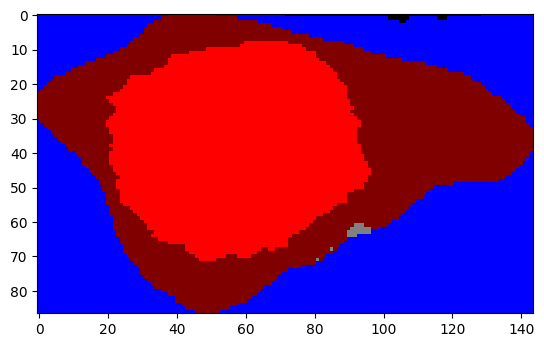

./sample_data/herlev_pap_smear/abnormal_moderate_dysplastic/153697342-153697375-002-d.bmp


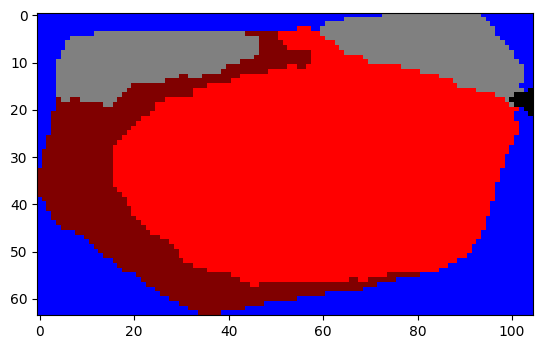


DIRECTORY:  normal_superficiel
148
Image Count  148
BMP Path  74
d.dmp Path  74
./sample_data/herlev_pap_smear/normal_superficiel/157223735-157223766-001.BMP


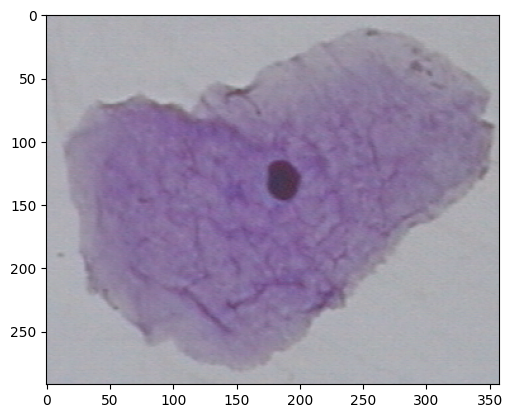

./sample_data/herlev_pap_smear/normal_superficiel/157268342-157268376-001.BMP


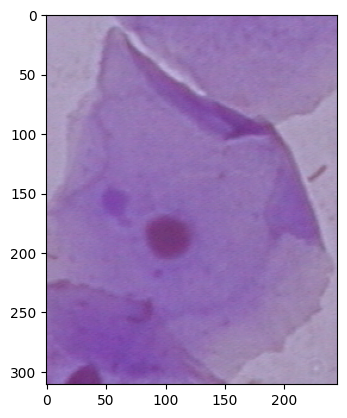

./sample_data/herlev_pap_smear/normal_superficiel/157268342-157268401-001-d.bmp


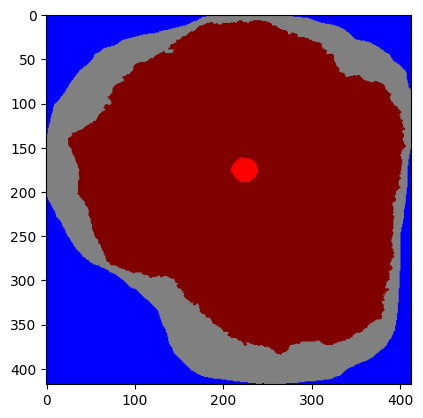

./sample_data/herlev_pap_smear/normal_superficiel/209047526-209047717-001-d.bmp


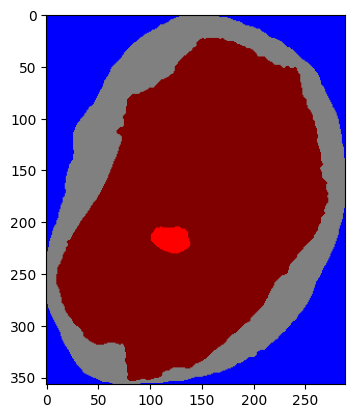


DIRECTORY:  abnormal_severe_dysplastic
394
Image Count  394
BMP Path  197
d.dmp Path  197
./sample_data/herlev_pap_smear/abnormal_severe_dysplastic/153659229-153659256-001.BMP


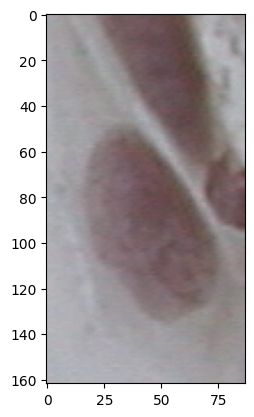

./sample_data/herlev_pap_smear/abnormal_severe_dysplastic/153915432-153915472-001.BMP


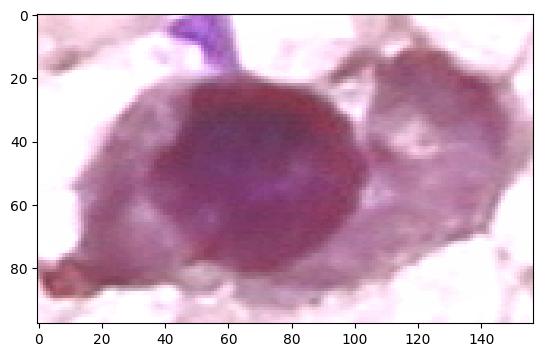

./sample_data/herlev_pap_smear/abnormal_severe_dysplastic/153916922-153916963-001-d.bmp


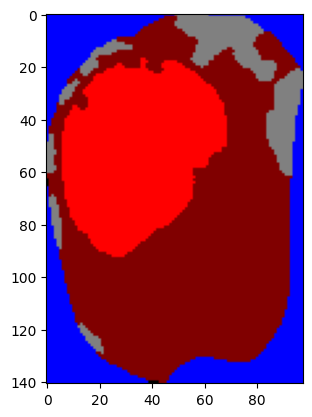

./sample_data/herlev_pap_smear/abnormal_severe_dysplastic/153829063-153829078-001-d.bmp


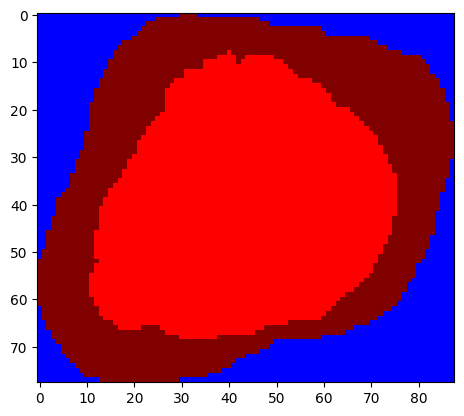


DIRECTORY:  abnormal_carcinoma_in_situ
300
Image Count  300
BMP Path  150
d.dmp Path  150
./sample_data/herlev_pap_smear/abnormal_carcinoma_in_situ/149187049-149187100-002.BMP


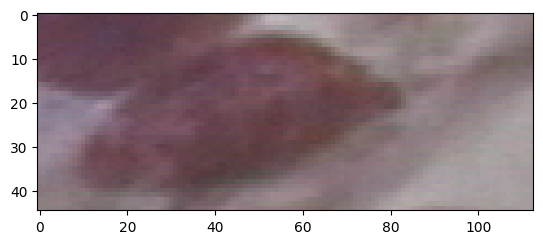

./sample_data/herlev_pap_smear/abnormal_carcinoma_in_situ/149181904-149182017-002.BMP


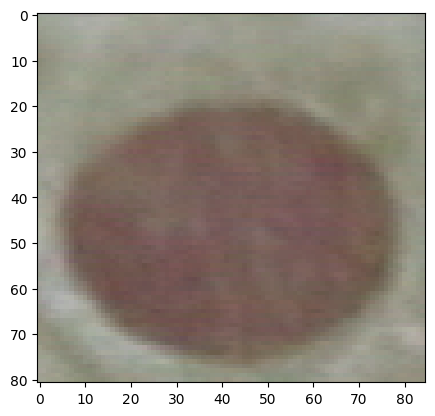

./sample_data/herlev_pap_smear/abnormal_carcinoma_in_situ/149185698-149185721-003-d.bmp


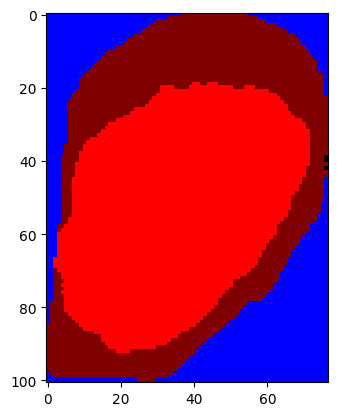

./sample_data/herlev_pap_smear/abnormal_carcinoma_in_situ/149146635-149146651-003-d.bmp


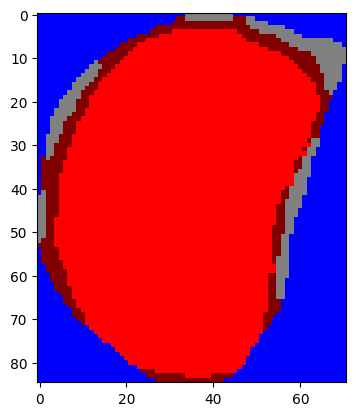


DIRECTORY:  normal_intermediate
140
Image Count  140
BMP Path  70
d.dmp Path  70
./sample_data/herlev_pap_smear/normal_intermediate/157183828-157183877-001.BMP


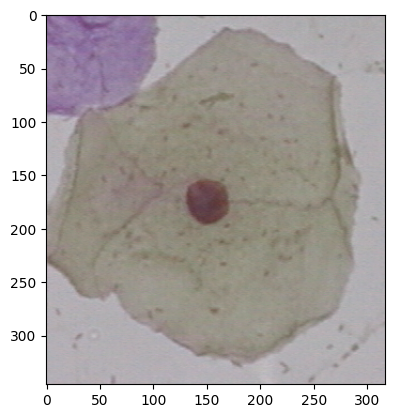

./sample_data/herlev_pap_smear/normal_intermediate/157222534-157223364-001.BMP


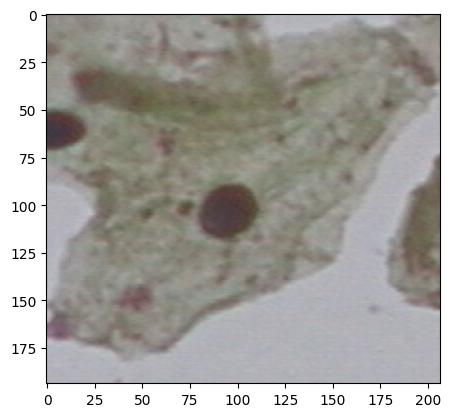

./sample_data/herlev_pap_smear/normal_intermediate/209047526-209047626-001-d.bmp


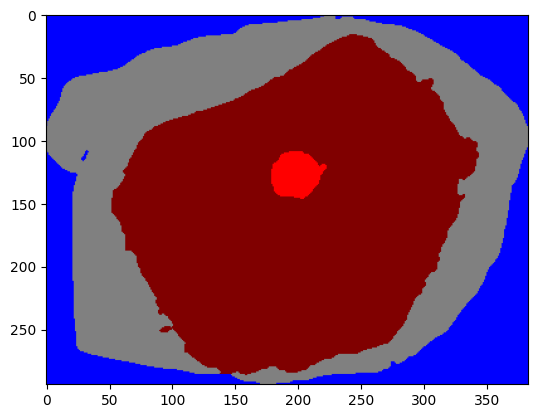

./sample_data/herlev_pap_smear/normal_intermediate/209047526-209047762-001-d.bmp


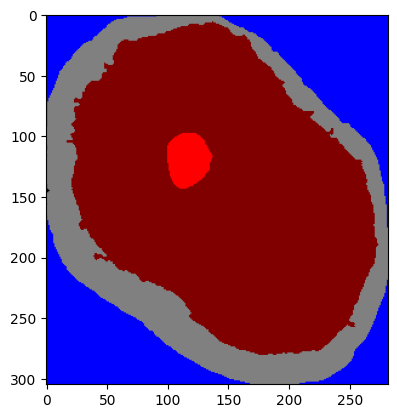

In [ ]:
herlev_image_path = './sample_data/herlev_pap_smear/'
sub_directories = os.listdir(herlev_image_path)
for sub_dir in sub_directories:
    dir_image_path = herlev_image_path+sub_dir
    print("\nDIRECTORY: ",sub_dir)    
    image_count = os.listdir(dir_image_path)
    print(len(image_count))
    BMP_paths= glob.glob(dir_image_path+'/*.BMP')
    d_bmp_paths= glob.glob(dir_image_path+'/*d.bmp')
    print("Image Count ",len(image_count))
    print("BMP Path ", len(BMP_paths))
    print("d.dmp Path ",len(d_bmp_paths))
    
    ##Display BMP verus d.bmp images
    #BMP images
    for path in BMP_paths[0:2]:
        print(path)
        img=cv2.imread(path)
        plt.imshow(img)  
        plt.show()
    #d_bmp images
    for path_d_bmp in d_bmp_paths[0:2]:
        print(path_d_bmp)
        img_bmp=cv2.imread(path_d_bmp)
        plt.imshow(img_bmp)  
        plt.show()

In [ ]:
def FormatDataset(dataset_src, dataset_dest, classes):
    #Making a copy of dataset
    new_cropped_dest = [os.path.join(dataset_dest, cls) for cls in classes]
    cropped_src = [ dataset_src + cls for cls in classes ]
    for (dest1) in (new_cropped_dest):
        os.makedirs(dest1)
    #Formating cropped images
    for (src,new_dest) in zip(cropped_src, new_cropped_dest):
        for file in os.listdir(src):
            filename, file_ext = os.path.splitext(file)
            if file_ext == '.BMP':
                img_des = os.path.join(new_dest, filename + '.jpg')
                img = cv2.imread(os.path.join(src, file))
                img = cv2.resize(img, (64, 64))
                img = cv2.copyMakeBorder(img, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=0)
                img = cv2.blur(img, (2, 2))
                cv2.imwrite(img_des ,img)

#Source location for dataset
src = './sample_data/herlev_pap_smear/'
#Destination location for dataset
dest = './sample_data/Herlev'
#Image classes
classes = ["abnormal_carcinoma_in_situ","abnormal_light_dysplastic","abnormal_moderate_dysplastic","abnormal_severe_dysplastic","normal_columnar","normal_intermediate","normal_superficiel"]
#Formatting dataset
FormatDataset(src, dest, classes)

In [ ]:
!rm -rf sample_data/sipakmed_fci_pap_smear
!rm -rf sample_data/sipakmed_wsi_pap_smear

In [ ]:
def GetDatasetSize(path, classes):
    num_of_image = {}
    for cls in classes:
        #Counting the number of files in the directory
        num_of_image[cls] = len(os.listdir(os.path.join(path, cls)))
    return num_of_image

In [ ]:
root_dir = "./sample_data/Herlev"
classes = ["abnormal_carcinoma_in_situ","abnormal_light_dysplastic","abnormal_moderate_dysplastic","abnormal_severe_dysplastic","normal_columnar","normal_intermediate","normal_superficiel"]
print(GetDatasetSize(root_dir, classes))

{'abnormal_carcinoma_in_situ': 150, 'abnormal_light_dysplastic': 182, 'abnormal_moderate_dysplastic': 146, 'abnormal_severe_dysplastic': 197, 'normal_columnar': 98, 'normal_intermediate': 70, 'normal_superficiel': 74}


Inference: Above is category-wise frequency of the dataset.

In [ ]:
#Understanding the files in different data directories
ab1_data = os.listdir('sample_data/Herlev/abnormal_carcinoma_in_situ/')
print("Squamous cell carcinoma: ",ab1_data[:10])

ab2_data = os.listdir('sample_data/Herlev/abnormal_light_dysplastic/')
print("Mild squamous non-keratinizing dysplasia: ",ab2_data[:10])

ab3_data = os.listdir('sample_data/Herlev/abnormal_moderate_dysplastic/')
print("Moderate squamous non-keratinizing dysplasia: ",ab3_data[:10])

ab4_data = os.listdir('sample_data/Herlev/abnormal_severe_dysplastic/')
print("Severe squamous non-keratinizing dysplasia: ",ab4_data[:10])

n1_data = os.listdir('sample_data/Herlev/normal_columnar/')
print("Columnar epithelial: ",n1_data[:10])

n2_data = os.listdir('sample_data/Herlev/normal_intermediate/')
print("Intermediate squamous epithelia: ",n2_data[:10])

n3_data = os.listdir('sample_data/Herlev/normal_superficiel/')
print("Superficial squamous epithelia: ",n3_data[:10])

Squamous cell carcinoma:  ['149316117-149316122-002.jpg', '153831471-153831479-001.jpg', '149314753-149314760-001.jpg', '149315372-149315390-001.jpg', '149182657-149182713-001.jpg', '149182550-149182571-003.jpg', '149314453-149314507-001.jpg', '149148124-149148168-001.jpg', '149316117-149316122-003.jpg', '153831471-153831486-001.jpg']
Mild squamous non-keratinizing dysplasia:  ['153701557-153701566-001.jpg', '154519964-154519981-001.jpg', '148883900-148883907-001.jpg', '149140169-149140178-001.jpg', '149058881-149058910-001.jpg', '153656862-153656891-001.jpg', '153314759-153314767-003.jpg', '148503568-148503598-001.jpg', '153657599-153657610-002.jpg', '149095913-149095926-001.jpg']
Moderate squamous non-keratinizing dysplasia:  ['149105131-149105205-003.jpg', '149105131-149105260-001.jpg', '153701139-153701158-001.jpg', '149058262-149058288-002.jpg', '149102510-149102527-002.jpg', '149057812-149057825-003.jpg', '153276386-153276405-001.jpg', '149099502-149099544-001.jpg', '149143434-14

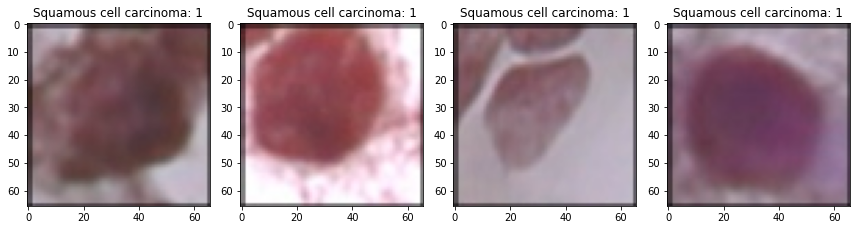

In [ ]:
#Class- Squamous cell carcinoma (abnormal)
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1,4,i+1)
    img = cv2.imread('sample_data/Herlev/abnormal_carcinoma_in_situ/' + "/" + ab1_data[i])
    plt.imshow(img)
    plt.title('Squamous cell carcinoma: 1')
    plt.tight_layout()
plt.show()

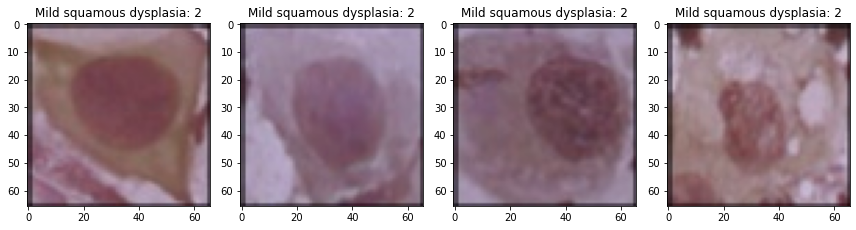

In [ ]:
#Class- Mild squamous non-keratinizing dysplasia (abnormal)
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1,4,i+1)
    img = cv2.imread('sample_data/Herlev/abnormal_light_dysplastic/' + "/" + ab2_data[i])
    plt.imshow(img)
    plt.title('Mild squamous dysplasia: 2')
    plt.tight_layout()
plt.show()

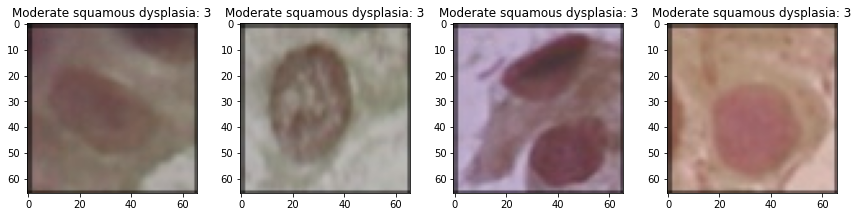

In [ ]:
#Class- Moderate squamous non-keratinizing dysplasia (abnormal)
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1,4,i+1)
    img = cv2.imread('sample_data/Herlev/abnormal_moderate_dysplastic/' + "/" + ab3_data[i])
    plt.imshow(img)
    plt.title('Moderate squamous dysplasia: 3')
    plt.tight_layout()
plt.show()

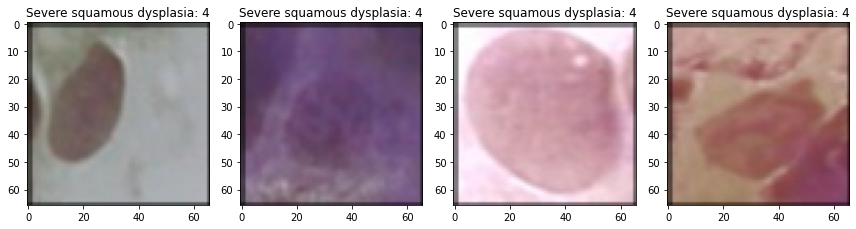

In [ ]:
#Class- Severe squamous non-keratinizing dysplasia (abnormal)
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1,4,i+1)
    img = cv2.imread('sample_data/Herlev/abnormal_severe_dysplastic/' + "/" + ab4_data[i])
    plt.imshow(img)
    plt.title('Severe squamous dysplasia: 4')
    plt.tight_layout()
plt.show()

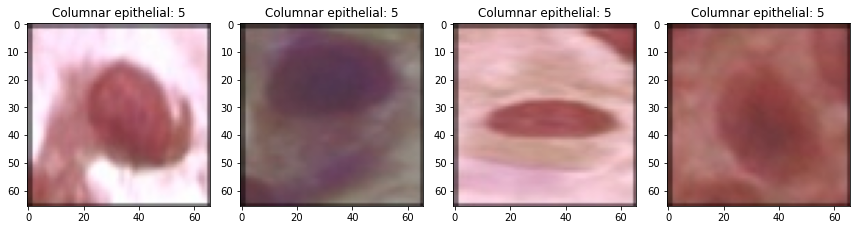

In [ ]:
#Class- Columnar epithelial (normal)
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1,4,i+1)
    img = cv2.imread('sample_data/Herlev/normal_columnar/' + "/" + n1_data[i])
    plt.imshow(img)
    plt.title('Columnar epithelial: 5')
    plt.tight_layout()
plt.show()

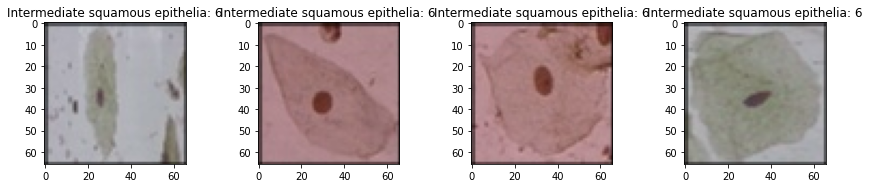

In [ ]:
#Class- Intermediate squamous epithelia (normal)
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1,4,i+1)
    img = cv2.imread('sample_data/Herlev/normal_intermediate/' + "/" + n2_data[i])
    plt.imshow(img)
    plt.title('Intermediate squamous epithelia: 6')
    plt.tight_layout()
plt.show()

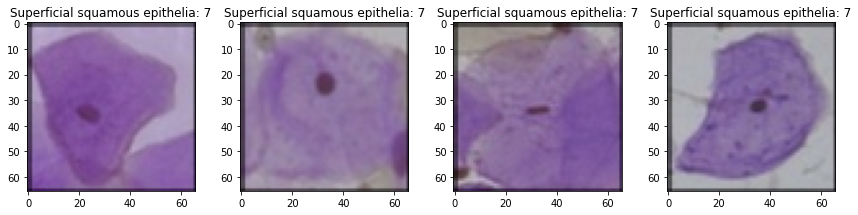

In [ ]:
#Class- Superficial squamous epithelia (normal)
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1,4,i+1)
    img = cv2.imread('sample_data/Herlev/normal_superficiel/' + "/" + n3_data[i])
    plt.imshow(img)
    plt.title('Superficial squamous epithelia: 7')
    plt.tight_layout()
plt.show()

Inference: The data visualization shows that Mild squamous non-keratinizing dysplasia, Moderate squamous non-keratinizing dysplasia, Severe squamous non-keratinizing dysplasia, and Squamous cell carcinoma groups are considered abnormal, and Superficial squamous epithelia, Intermediate squamous epithelia, and Columnar epithelial are considered normal.

In [ ]:
herlev_image_path = './sample_data/herlev_pap_smear/'
list_herlev = os.listdir(herlev_image_path)
list_herlev.sort(reverse=True)

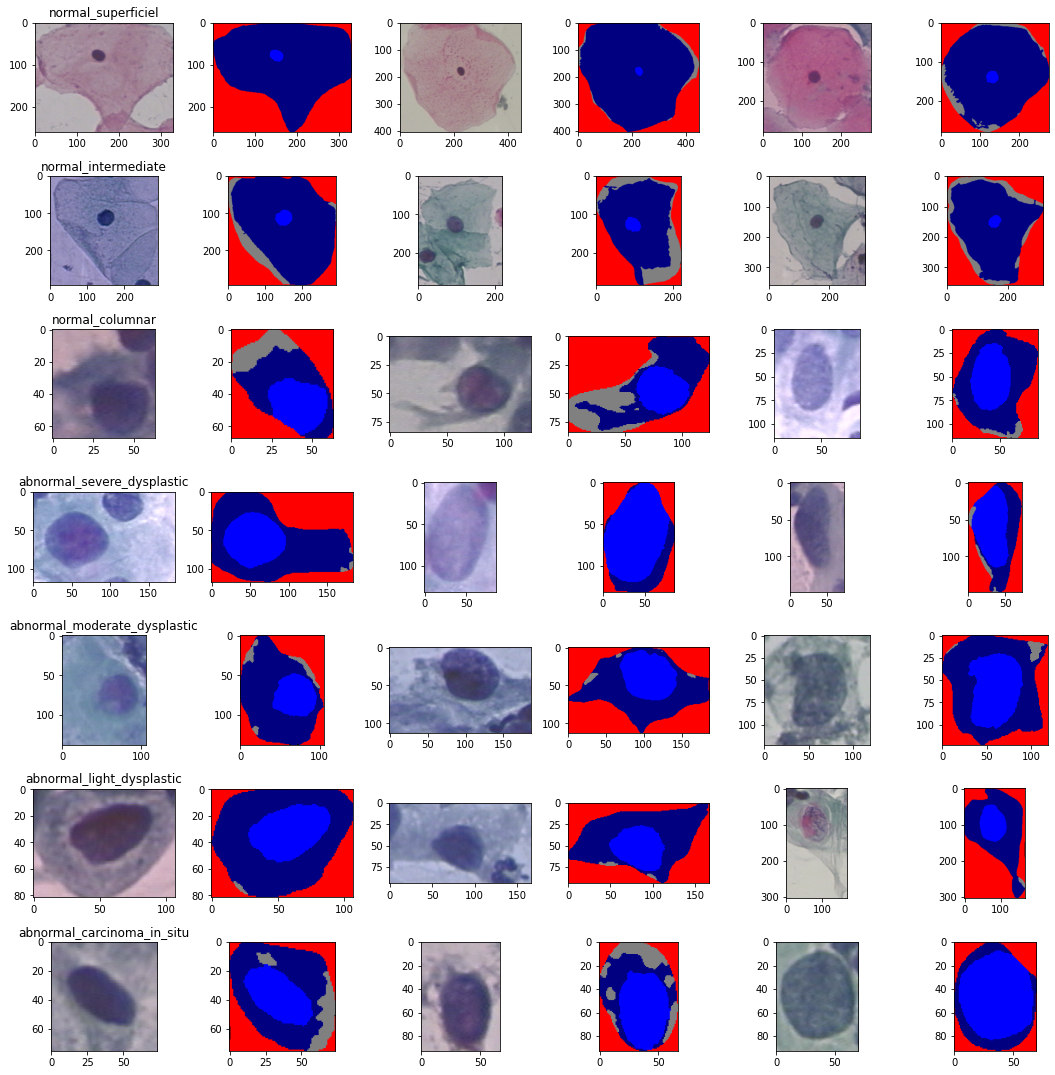

In [ ]:
fig, axes = plt.subplots(7, 6, figsize=(15,15))
for i in range(7):
    axes[i,0].set_title(list_herlev[i])
    for j in range(3):
        img_list = os.listdir(herlev_image_path+list_herlev[i])
        img_list = [item for item in img_list if item[-5] != 'd']
        img_name = '{}{}/{}'.format(herlev_image_path, list_herlev[i], img_list[j*2-1])
        img_d_name = img_name[:-4]+'-d'+img_name[-4:].lower()
        img = plt.imread(img_name)
        img_d = plt.imread(img_d_name)
        axes[i, 2*j].imshow(img)
        axes[i, 2*j+1].imshow(img_d)
plt.tight_layout()
plt.show()

Inference: We can observe that a characteristic of abnormal cells is that they have a very large nucleus compared to the rest of the cell. In a few examples, it occupies almost the entire cell.

### Applying Pre-trained Models over Original Images

In [ ]:
def TrainTestValSplit(root_dir, classes_dir, val_ratio = 0.1, test_ratio = 0.1):
    for cls in classes_dir:
        #Creating separate folders
        os.makedirs('sample_data/train_org/' + cls)
        os.makedirs('sample_data/test_org/' + cls)
        os.makedirs('sample_data/val_org/' + cls)
        
        src = os.path.join(root_dir, cls)

        #Spliting the image files in the given ratio
        allFileNames = os.listdir(src)
        np.random.shuffle(allFileNames)
        train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames), [int(len(allFileNames)* (1 - (val_ratio + test_ratio))), int(len(allFileNames)* (1 - test_ratio))])

        train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
        test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]
        val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]

        #To display the split details
        print(cls,':')
        print('Total Images: ', len(allFileNames))
        print('Training: ', len(train_FileNames))
        print('Testing: ', len(test_FileNames))
        print('Validation: ', len(val_FileNames))
        
        for name in train_FileNames:
            shutil.copy(name, 'sample_data/train_org/' + cls)
        for name in test_FileNames:
            shutil.copy(name, 'sample_data/test_org/' + cls)
        for name in val_FileNames:
            shutil.copy(name, 'sample_data/val_org/' + cls)

        print()

root_dir = "./sample_data/Herlev"
classes = ["abnormal_carcinoma_in_situ","abnormal_light_dysplastic","abnormal_moderate_dysplastic","abnormal_severe_dysplastic","normal_columnar","normal_intermediate","normal_superficiel"]
TrainTestValSplit(root_dir, classes)

abnormal_carcinoma_in_situ :
Total Images:  150
Training:  120
Testing:  15
Validation:  15

abnormal_light_dysplastic :
Total Images:  182
Training:  145
Testing:  19
Validation:  18

abnormal_moderate_dysplastic :
Total Images:  146
Training:  116
Testing:  15
Validation:  15

abnormal_severe_dysplastic :
Total Images:  197
Training:  157
Testing:  20
Validation:  20

normal_columnar :
Total Images:  98
Training:  78
Testing:  10
Validation:  10

normal_intermediate :
Total Images:  70
Training:  56
Testing:  7
Validation:  7

normal_superficiel :
Total Images:  74
Training:  59
Testing:  8
Validation:  7



In [ ]:
train_org_dir = "sample_data/train_org/"
test_org_dir = "sample_data/test_org/"
val_org_dir = "sample_data/val_org/"

#Rescaling
train_org = ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2, rescale = 1./255, horizontal_flip=True)
test_org = ImageDataGenerator(rescale = 1./255)
val_org = ImageDataGenerator(rescale = 1./255)

#Transfer the data from directories to batches
train_org_data = train_org.flow_from_directory(directory = train_org_dir,
                                               batch_size= 32,
                                               target_size= (75,75),
                                               class_mode = "categorical")

train_org_data.class_indices

Found 731 images belonging to 7 classes.


{'abnormal_carcinoma_in_situ': 0,
 'abnormal_light_dysplastic': 1,
 'abnormal_moderate_dysplastic': 2,
 'abnormal_severe_dysplastic': 3,
 'normal_columnar': 4,
 'normal_intermediate': 5,
 'normal_superficiel': 6}

In [ ]:
test_org_data = test_org.flow_from_directory(directory = test_org_dir,
                                               batch_size = 32,
                                               target_size = (75,75),
                                               class_mode = "categorical")

val_org_data = val_org.flow_from_directory(directory = val_org_dir,
                                               batch_size = 32,
                                               target_size = (75,75),
                                               class_mode = "categorical")

Found 94 images belonging to 7 classes.
Found 92 images belonging to 7 classes.


#### Using ResNet50 Model

In [ ]:
base_model = ResNet50(input_shape=(66,66,3),
                      include_top=False,)

for layer in base_model.layers:
       layer.trainable = False

In [ ]:
model_resnet = Sequential()
model_resnet.add(base_model)
model_resnet.add(layers.Dropout(0.25))
model_resnet.add(layers.Flatten())
model_resnet.add(layers.Dropout(0.5))
model_resnet.add(layers.Dense(7, activation='softmax'))

In [ ]:
model_resnet.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.002), 
                     loss = 'categorical_crossentropy', 
                     metrics = ['accuracy', 'Precision', 'Recall'])

model_resnet.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 3, 3, 2048)        23587712  
                                                                 
 dropout_25 (Dropout)        (None, 3, 3, 2048)        0         
                                                                 
 flatten_13 (Flatten)        (None, 18432)             0         
                                                                 
 dropout_26 (Dropout)        (None, 18432)             0         
                                                                 
 dense_14 (Dense)            (None, 7)                 129031    
                                                                 
Total params: 23,716,743
Trainable params: 129,031
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
#Adding model check point callback
mc = ModelCheckpoint(
    filepath="./oc_resnet_org_best_model.hdf5",
    verbose= 0,
    save_best_only= True
    )
call_back = [mc];

In [ ]:
#Fitting the model
resnet = model_resnet.fit(
    train_org_data, 
    steps_per_epoch = len(train_org_data), 
    epochs = 5, 
    validation_data = val_org_data, 
    validation_steps = len(val_org_data),
    callbacks = call_back 
    )

Epoch 1/5
23/23 [==============================] - 31s 1s/step - loss: 2.4885 - accuracy: 0.1683 - precision: 0.1818 - recall: 0.0547 - val_loss: 1.9790 - val_accuracy: 0.2174 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/5
23/23 [==============================] - 26s 1s/step - loss: 2.2026 - accuracy: 0.1573 - precision: 0.2243 - recall: 0.0328 - val_loss: 1.9341 - val_accuracy: 0.2283 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/5
23/23 [==============================] - 26s 1s/step - loss: 2.1206 - accuracy: 0.1778 - precision: 0.2389 - recall: 0.0369 - val_loss: 1.9090 - val_accuracy: 0.2174 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/5
23/23 [==============================] - 25s 1s/step - loss: 2.1296 - accuracy: 0.2011 - precision: 0.2126 - recall: 0.0369 - val_loss: 1.9361 - val_accuracy: 0.1957 - val_precision: 1.0000 - val_recall: 0.0109
Epoch 5/5
23/23 [==============================] - 25s 1s/step - loss: 2.1832 - accuracy: 0.

In [ ]:
#Loading the best fit model
resnet_model = load_model("./oc_resnet_org_best_model.hdf5")

In [ ]:
#Checking the accuracy, precision and recall of the model
accuracy_resnet_org = resnet_model.evaluate_generator(generator= test_org_data)[1]
precision_resnet_org = resnet_model.evaluate_generator(generator= test_org_data)[2]
recall_resnet_org = resnet_model.evaluate_generator(generator= test_org_data)[3]
print(f"Accuracy = {accuracy_resnet_org*100} %")
print(f"Precision = {precision_resnet_org*100} %")
print(f"Recall = {recall_resnet_org*100} %")

<ipython-input-115-c0aefe10376c>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy_resnet_org = resnet_model.evaluate_generator(generator= test_org_data)[1]
<ipython-input-115-c0aefe10376c>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  precision_resnet_org = resnet_model.evaluate_generator(generator= test_org_data)[2]
<ipython-input-115-c0aefe10376c>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  recall_resnet_org = resnet_model.evaluate_generator(generator= test_org_data)[3]


Accuracy = 25.531914830207825 %
Precision = 0.0 %
Recall = 0.0 %


#### Using VGG16 Model

In [ ]:
model_VGG = VGG16(
    input_shape = (66,66,3),
    include_top = False
    )

for layer in model_VGG.layers:
       layer.trainable = False

In [ ]:
vgg16 = Sequential()
vgg16.add(model_VGG)
vgg16.add(layers.Dropout(0.25))
vgg16.add(layers.Flatten())
vgg16.add(layers.Dropout(0.5))
vgg16.add(layers.Dense(7, activation='softmax'))

In [ ]:
vgg16.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
    metrics=['accuracy', 'Precision', 'Recall']
)

vgg16.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 dropout_15 (Dropout)        (None, 2, 2, 512)         0         
                                                                 
 flatten_8 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_16 (Dropout)        (None, 2048)              0         
                                                                 
 dense_9 (Dense)             (None, 7)                 14343     
                                                                 
Total params: 14,729,031
Trainable params: 14,343
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
#Adding model check point callback
mc = ModelCheckpoint(
    filepath="./oc_vgg_org_best_model.hdf5",
    verbose= 0,
    save_best_only= True
    );
call_back = [ mc ];

In [ ]:
#Fitting the model
vgg = vgg16.fit(
    train_org_data,
    steps_per_epoch = train_org_data.samples//train_org_data.batch_size, 
    epochs = 5, 
    validation_data = val_org_data, 
    validation_steps = val_org_data.samples//val_org_data.batch_size,
    callbacks=call_back
)

Epoch 1/5
22/22 [==============================] - 54s 2s/step - loss: 2.1879 - accuracy: 0.1946 - precision: 0.2448 - recall: 0.0501 - val_loss: 1.9304 - val_accuracy: 0.2031 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/5
22/22 [==============================] - 51s 2s/step - loss: 1.8637 - accuracy: 0.2246 - precision: 0.2667 - recall: 0.0286 - val_loss: 1.7135 - val_accuracy: 0.3281 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/5
22/22 [==============================] - 52s 2s/step - loss: 1.6872 - accuracy: 0.3062 - precision: 0.4744 - recall: 0.0529 - val_loss: 1.6173 - val_accuracy: 0.3281 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/5
22/22 [==============================] - 58s 3s/step - loss: 1.6138 - accuracy: 0.3233 - precision: 0.5067 - recall: 0.0544 - val_loss: 1.5132 - val_accuracy: 0.4062 - val_precision: 0.3333 - val_recall: 0.0156
Epoch 5/5
22/22 [==============================] - 52s 2s/step - loss: 1.5341 - accuracy: 0.

In [ ]:
#Loading the best fit model
modelVGG = load_model("./oc_vgg_org_best_model.hdf5")

In [ ]:
#Checking the accuracy, precision and recall of the model
accuracy_vgg_org = modelVGG.evaluate_generator(generator= test_org_data)[1]
precision_vgg_org = modelVGG.evaluate_generator(generator= test_org_data)[2]
recall_vgg_org = modelVGG.evaluate_generator(generator= test_org_data)[3]
print(f"Accuracy = {accuracy_vgg_org*100} %")
print(f"Precision = {precision_vgg_org*100} %")
print(f"Recall = {recall_vgg_org*100} %")

<ipython-input-77-1a834e9639e2>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy_vgg_org = modelVGG.evaluate_generator(generator= test_org_data)[1]
<ipython-input-77-1a834e9639e2>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  precision_vgg_org = modelVGG.evaluate_generator(generator= test_org_data)[2]
<ipython-input-77-1a834e9639e2>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  recall_vgg_org = modelVGG.evaluate_generator(generator= test_org_data)[3]


Accuracy = 48.93617033958435 %
Precision = 69.2307710647583 %
Recall = 9.574468433856964 %


#### Using VGG19 Model

In [ ]:
model_VGG = VGG19(
    input_shape = (66,66,3),
    include_top = False
    )

for layer in model_VGG.layers:
       layer.trainable = False

In [ ]:
vgg19 = Sequential()
vgg19.add(model_VGG)
vgg19.add(layers.Dropout(0.25))
vgg19.add(layers.Flatten())
vgg19.add(layers.Dropout(0.5))
vgg19.add(layers.Dense(7, activation='softmax'))

In [ ]:
vgg19.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
    metrics=['accuracy', 'Precision', 'Recall']
)

vgg19.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 2, 2, 512)         20024384  
                                                                 
 dropout_17 (Dropout)        (None, 2, 2, 512)         0         
                                                                 
 flatten_9 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_18 (Dropout)        (None, 2048)              0         
                                                                 
 dense_10 (Dense)            (None, 7)                 14343     
                                                                 
Total params: 20,038,727
Trainable params: 14,343
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
#Adding model check point callback
mc = ModelCheckpoint(
    filepath="./oc_vgg19_org_best_model.hdf5",
    verbose= 0,
    save_best_only= True
    );
call_back = [ mc ];

In [ ]:
#Fitting the model
vgg = vgg19.fit(
    train_org_data,
    steps_per_epoch = train_org_data.samples//train_org_data.batch_size, 
    epochs = 5, 
    validation_data = val_org_data, 
    validation_steps = val_org_data.samples//val_org_data.batch_size,
    callbacks=call_back
)

Epoch 1/5
22/22 [==============================] - 70s 3s/step - loss: 2.2582 - accuracy: 0.1731 - precision: 0.2042 - recall: 0.0558 - val_loss: 1.7938 - val_accuracy: 0.4062 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/5
22/22 [==============================] - 65s 3s/step - loss: 1.8456 - accuracy: 0.2861 - precision: 0.3310 - recall: 0.0672 - val_loss: 1.6516 - val_accuracy: 0.3438 - val_precision: 0.6667 - val_recall: 0.0312
Epoch 3/5
22/22 [==============================] - 64s 3s/step - loss: 1.7072 - accuracy: 0.2983 - precision: 0.4215 - recall: 0.0724 - val_loss: 1.5529 - val_accuracy: 0.4062 - val_precision: 0.5000 - val_recall: 0.0312
Epoch 4/5
22/22 [==============================] - 63s 3s/step - loss: 1.6513 - accuracy: 0.3381 - precision: 0.5610 - recall: 0.0980 - val_loss: 1.5457 - val_accuracy: 0.3438 - val_precision: 0.6667 - val_recall: 0.0312
Epoch 5/5
22/22 [==============================] - 67s 3s/step - loss: 1.5591 - accuracy: 0.3605 - precision

In [ ]:
#Loading the best fit model
modelVGG19 = load_model("./oc_vgg19_org_best_model.hdf5")

In [ ]:
#Checking the accuracy, precision and recall of the model
accuracy_vgg19_org = modelVGG19.evaluate_generator(generator= test_org_data)[1]
precision_vgg19_org = modelVGG19.evaluate_generator(generator= test_org_data)[2]
recall_vgg19_org = modelVGG19.evaluate_generator(generator= test_org_data)[3]
print(f"Accuracy = {accuracy_vgg19_org*100} %")
print(f"Precision = {precision_vgg19_org*100} %")
print(f"Recall = {recall_vgg19_org*100} %")

<ipython-input-84-ccac99d9fbee>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy_vgg19_org = modelVGG19.evaluate_generator(generator= test_org_data)[1]
<ipython-input-84-ccac99d9fbee>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  precision_vgg19_org = modelVGG19.evaluate_generator(generator= test_org_data)[2]
<ipython-input-84-ccac99d9fbee>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  recall_vgg19_org = modelVGG19.evaluate_generator(generator= test_org_data)[3]


Accuracy = 45.7446813583374 %
Precision = 81.81818127632141 %
Recall = 9.574468433856964 %


#### Using DenseNet121 Model

In [ ]:
model_densenet121 = DenseNet121(
    input_shape = (66,66,3),
    include_top = False
    )

for layer in model_densenet121.layers:
       layer.trainable = False

In [ ]:
densenet121 = tf.keras.Sequential()
densenet121.add(model_densenet121)
densenet121.add(layers.Dropout(0.25))
densenet121.add(layers.Flatten())
densenet121.add(layers.Dropout(0.5))
densenet121.add(layers.Dense(7, activation='softmax'))

In [ ]:
densenet121.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
    metrics=['accuracy', 'Precision', 'Recall']
)

densenet121.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 2, 2, 1024)        7037504   
                                                                 
 dropout_21 (Dropout)        (None, 2, 2, 1024)        0         
                                                                 
 flatten_11 (Flatten)        (None, 4096)              0         
                                                                 
 dropout_22 (Dropout)        (None, 4096)              0         
                                                                 
 dense_12 (Dense)            (None, 7)                 28679     
                                                                 
Total params: 7,066,183
Trainable params: 28,679
Non-trainable params: 7,037,504
_________________________________________________________________


In [ ]:
#Adding model check point callback
mc = ModelCheckpoint(
    filepath="./oc_densenet121_org_best_model.hdf5",
    verbose= 0,
    save_best_only= True
    );
call_back = [ mc ];

In [ ]:
#Fitting the model
densenet = densenet121.fit(
    train_org_data,
    steps_per_epoch = train_org_data.samples//train_org_data.batch_size, 
    epochs = 5, 
    validation_data = val_org_data, 
    validation_steps = val_org_data.samples//val_org_data.batch_size,
    callbacks=call_back
)

Epoch 1/5
22/22 [==============================] - 34s 896ms/step - loss: 2.9672 - accuracy: 0.2904 - precision: 0.3089 - recall: 0.2475 - val_loss: 1.7435 - val_accuracy: 0.4219 - val_precision: 0.4444 - val_recall: 0.3125
Epoch 2/5
22/22 [==============================] - 16s 683ms/step - loss: 2.1876 - accuracy: 0.4177 - precision: 0.4419 - recall: 0.3805 - val_loss: 1.7660 - val_accuracy: 0.3125 - val_precision: 0.3571 - val_recall: 0.2344
Epoch 3/5
22/22 [==============================] - 16s 712ms/step - loss: 2.3167 - accuracy: 0.4177 - precision: 0.4349 - recall: 0.3777 - val_loss: 1.4723 - val_accuracy: 0.4688 - val_precision: 0.5745 - val_recall: 0.4219
Epoch 4/5
22/22 [==============================] - 16s 745ms/step - loss: 1.8268 - accuracy: 0.4778 - precision: 0.5017 - recall: 0.4349 - val_loss: 1.6779 - val_accuracy: 0.4531 - val_precision: 0.5306 - val_recall: 0.4062
Epoch 5/5
22/22 [==============================] - 15s 692ms/step - loss: 1.7697 - accuracy: 0.5136 - pr

In [ ]:
#Loading the best fit model
modeldensenet121 = load_model("./oc_densenet121_org_best_model.hdf5")

In [ ]:
#Checking the accuracy, precision and recall of the model
accuracy_densenet121_org = modeldensenet121.evaluate_generator(generator= test_org_data)[1]
precision_densenet121_org = modeldensenet121.evaluate_generator(generator= test_org_data)[2]
recall_densenet121_org = modeldensenet121.evaluate_generator(generator= test_org_data)[3]
print(f"Accuracy = {accuracy_densenet121_org*100} %")
print(f"Precision = {precision_densenet121_org*100} %")
print(f"Recall = {recall_densenet121_org*100} %")

<ipython-input-101-f365a3fe878f>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy_densenet121_org = modeldensenet121.evaluate_generator(generator= test_org_data)[1]
<ipython-input-101-f365a3fe878f>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  precision_densenet121_org = modeldensenet121.evaluate_generator(generator= test_org_data)[2]
<ipython-input-101-f365a3fe878f>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  recall_densenet121_org = modeldensenet121.evaluate_generator(generator= test_org_data)[3]


Accuracy = 54.2553186416626 %
Precision = 60.00000238418579 %
Recall = 47.8723406791687 %


#### Using DenseNet201 Model

In [ ]:
model_densenet = DenseNet201(
    input_shape = (66,66,3),
    include_top = False
    )

for layer in model_densenet.layers:
       layer.trainable = False

In [ ]:
densenet201 = Sequential()
densenet201.add(model_densenet)
densenet201.add(layers.Dropout(0.25))
densenet201.add(layers.Flatten())
densenet201.add(layers.Dropout(0.5))
densenet201.add(layers.Dense(7, activation='softmax'))

In [ ]:
densenet201.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
    metrics=['accuracy', 'Precision', 'Recall']
)

densenet201.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 2, 2, 1920)        18321984  
                                                                 
 dropout_23 (Dropout)        (None, 2, 2, 1920)        0         
                                                                 
 flatten_12 (Flatten)        (None, 7680)              0         
                                                                 
 dropout_24 (Dropout)        (None, 7680)              0         
                                                                 
 dense_13 (Dense)            (None, 7)                 53767     
                                                                 
Total params: 18,375,751
Trainable params: 53,767
Non-trainable params: 18,321,984
_________________________________________________________________


In [ ]:
#Adding model check point callback
mc = ModelCheckpoint(
    filepath="./oc_densenet_org_best_model.hdf5",
    verbose= 0,
    save_best_only= True
    );
call_back = [ mc ];

In [ ]:
#Fitting the model
densenet = densenet201.fit(
    train_org_data,
    steps_per_epoch = train_org_data.samples//train_org_data.batch_size, 
    epochs = 5, 
    validation_data = val_org_data, 
    validation_steps = val_org_data.samples//val_org_data.batch_size,
    callbacks=call_back
)

Epoch 1/5
22/22 [==============================] - 49s 1s/step - loss: 2.6683 - accuracy: 0.3119 - precision: 0.3289 - recall: 0.2461 - val_loss: 1.8875 - val_accuracy: 0.4062 - val_precision: 0.4565 - val_recall: 0.3281
Epoch 2/5
22/22 [==============================] - 25s 1s/step - loss: 1.9723 - accuracy: 0.4389 - precision: 0.4893 - recall: 0.3906 - val_loss: 1.5252 - val_accuracy: 0.3750 - val_precision: 0.4324 - val_recall: 0.2500
Epoch 3/5
22/22 [==============================] - 22s 974ms/step - loss: 1.9183 - accuracy: 0.4702 - precision: 0.5094 - recall: 0.4247 - val_loss: 1.6757 - val_accuracy: 0.3906 - val_precision: 0.4400 - val_recall: 0.3438
Epoch 4/5
22/22 [==============================] - 22s 1s/step - loss: 1.5786 - accuracy: 0.5150 - precision: 0.5556 - recall: 0.4649 - val_loss: 1.3382 - val_accuracy: 0.5000 - val_precision: 0.5682 - val_recall: 0.3906
Epoch 5/5
22/22 [==============================] - 24s 1s/step - loss: 1.6199 - accuracy: 0.5222 - precision: 0.5

In [ ]:
#Loading the best fit model
modeldensenet = load_model("./oc_densenet_org_best_model.hdf5")

In [ ]:
#Checking the accuracy, precision and recall of the model
accuracy_densenet_org = modeldensenet.evaluate_generator(generator= test_org_data)[1]
precision_densenet_org = modeldensenet.evaluate_generator(generator= test_org_data)[2]
recall_densenet_org = modeldensenet.evaluate_generator(generator= test_org_data)[3]
print(f"Accuracy = {accuracy_densenet_org*100} %")
print(f"Precision = {precision_densenet_org*100} %")
print(f"Recall = {recall_densenet_org*100} %")

<ipython-input-108-aa3836dc302c>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy_densenet_org = modeldensenet.evaluate_generator(generator= test_org_data)[1]
<ipython-input-108-aa3836dc302c>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  precision_densenet_org = modeldensenet.evaluate_generator(generator= test_org_data)[2]
<ipython-input-108-aa3836dc302c>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  recall_densenet_org = modeldensenet.evaluate_generator(generator= test_org_data)[3]


Accuracy = 57.446807622909546 %
Precision = 61.11111044883728 %
Recall = 46.80851101875305 %


#### Using DenseNet201 Model

In [ ]:
model_densenet = DenseNet201(
    input_shape = (66,66,3),
    include_top = False
    )

for layer in model_densenet.layers:
       layer.trainable = False

In [ ]:
densenet201 = Sequential()
densenet201.add(model_densenet)
densenet201.add(layers.Dropout(0.25))
densenet201.add(layers.Flatten())
densenet201.add(layers.Dropout(0.5))
densenet201.add(layers.Dense(7, activation='softmax'))

In [ ]:
densenet201.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
    metrics=['accuracy', 'Precision', 'Recall']
)

densenet201.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 2, 2, 1920)        18321984  
                                                                 
 dropout_4 (Dropout)         (None, 2, 2, 1920)        0         
                                                                 
 flatten_2 (Flatten)         (None, 7680)              0         
                                                                 
 dropout_5 (Dropout)         (None, 7680)              0         
                                                                 
 dense_2 (Dense)             (None, 7)                 53767     
                                                                 
Total params: 18,375,751
Trainable params: 53,767
Non-trainable params: 18,321,984
_________________________________________________________________


In [ ]:
#Adding model check point callback
mc = ModelCheckpoint(
    filepath="./oc_densenet_org_best_model.hdf5",
    verbose= 0,
    save_best_only= True
    );
call_back = [ mc ];

In [ ]:
#Fitting the model
densenet = densenet201.fit(
    train_org_data,
    steps_per_epoch = train_org_data.samples//train_org_data.batch_size, 
    epochs = 5, 
    validation_data = val_org_data, 
    validation_steps = val_org_data.samples//val_org_data.batch_size,
    callbacks=call_back
)

Epoch 1/5
22/22 [==============================] - 41s 1s/step - loss: 2.5318 - accuracy: 0.2961 - precision: 0.3231 - recall: 0.2260 - val_loss: 1.3134 - val_accuracy: 0.5000 - val_precision: 0.5455 - val_recall: 0.3750
Epoch 2/5
22/22 [==============================] - 21s 954ms/step - loss: 1.9826 - accuracy: 0.4392 - precision: 0.4729 - recall: 0.3863 - val_loss: 1.2179 - val_accuracy: 0.5781 - val_precision: 0.6346 - val_recall: 0.5156
Epoch 3/5
22/22 [==============================] - 29s 1s/step - loss: 1.8966 - accuracy: 0.4492 - precision: 0.4905 - recall: 0.4063 - val_loss: 1.1388 - val_accuracy: 0.5000 - val_precision: 0.5532 - val_recall: 0.4062
Epoch 4/5
22/22 [==============================] - 21s 971ms/step - loss: 1.6793 - accuracy: 0.4979 - precision: 0.5341 - recall: 0.4478 - val_loss: 1.4435 - val_accuracy: 0.4688 - val_precision: 0.4909 - val_recall: 0.4219
Epoch 5/5
22/22 [==============================] - 21s 953ms/step - loss: 1.7392 - accuracy: 0.4979 - precisio

In [ ]:
#Loading the best fit model
modeldensenet = load_model("./oc_densenet_org_best_model.hdf5")

In [ ]:
#Checking the accuracy, precision and recall of the model
accuracy_densenet_org = modeldensenet.evaluate_generator(generator= test_org_data)[1]
precision_densenet_org = modeldensenet.evaluate_generator(generator= test_org_data)[2]
recall_densenet_org = modeldensenet.evaluate_generator(generator= test_org_data)[3]
print(f"Accuracy = {accuracy_densenet_org*100} %")
print(f"Precision = {precision_densenet_org*100} %")
print(f"Recall = {recall_densenet_org*100} %")

<ipython-input-35-aa3836dc302c>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy_densenet_org = modeldensenet.evaluate_generator(generator= test_org_data)[1]
<ipython-input-35-aa3836dc302c>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  precision_densenet_org = modeldensenet.evaluate_generator(generator= test_org_data)[2]
<ipython-input-35-aa3836dc302c>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  recall_densenet_org = modeldensenet.evaluate_generator(generator= test_org_data)[3]


Accuracy = 48.93617033958435 %
Precision = 57.14285969734192 %
Recall = 42.553192377090454 %


#### Using InceptionV3 Model

In [ ]:
base_model = InceptionV3(input_shape = (75,75,3), 
                         include_top = False,)

for layer in base_model.layers:
       layer.trainable = False

87910968/87910968 [==============================] - 1s 0us/step


In [ ]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(7, activation='softmax')(x)

In [ ]:
model_incep = tf.keras.models.Model(base_model.input, x)

model_incep.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.002), 
                    loss = 'categorical_crossentropy', 
                    metrics = ['accuracy', 'Precision', 'Recall'])

In [ ]:
#Adding model check point callback
mc = ModelCheckpoint(
    filepath="./oc_inception_org_best_model.hdf5",
    verbose= 0,
    save_best_only= True
    );
call_back = [mc];

In [ ]:
#Fitting the model
incep = model_incep.fit(
    train_org_data, 
    steps_per_epoch = train_org_data.samples//train_org_data.batch_size, 
    epochs = 5, 
    validation_data = val_org_data, 
    validation_steps = val_org_data.samples//val_org_data.batch_size,
    callbacks = call_back 
    )

Epoch 1/5
22/22 [==============================] - 20s 611ms/step - loss: 2.5887 - accuracy: 0.3104 - precision: 0.3710 - recall: 0.2160 - val_loss: 1.5088 - val_accuracy: 0.4219 - val_precision: 0.6250 - val_recall: 0.2344
Epoch 2/5
22/22 [==============================] - 10s 455ms/step - loss: 1.6438 - accuracy: 0.4063 - precision: 0.4871 - recall: 0.2704 - val_loss: 1.5428 - val_accuracy: 0.3438 - val_precision: 0.4762 - val_recall: 0.1562
Epoch 3/5
22/22 [==============================] - 11s 484ms/step - loss: 1.5254 - accuracy: 0.4292 - precision: 0.5335 - recall: 0.2847 - val_loss: 1.3325 - val_accuracy: 0.5469 - val_precision: 0.6538 - val_recall: 0.2656
Epoch 4/5
22/22 [==============================] - 9s 384ms/step - loss: 1.4146 - accuracy: 0.4535 - precision: 0.5438 - recall: 0.3019 - val_loss: 1.3485 - val_accuracy: 0.4531 - val_precision: 0.6000 - val_recall: 0.2812
Epoch 5/5
22/22 [==============================] - 11s 471ms/step - loss: 1.3762 - accuracy: 0.4793 - pre

In [ ]:
#Loading the best fit model
inceptionv3_model = load_model("./oc_inception_org_best_model.hdf5")

In [ ]:
#Checking the accuracy, precision and recall of the model
accuracy_incep_org = inceptionv3_model.evaluate_generator(generator= test_org_data)[1]
precision_incep_org = inceptionv3_model.evaluate_generator(generator= test_org_data)[2]
recall_incep_org = inceptionv3_model.evaluate_generator(generator= test_org_data)[3]
print(f"Accuracy = {accuracy_incep_org*100} %")
print(f"Precision = {precision_incep_org*100} %")
print(f"Recall = {recall_incep_org*100} %")

<ipython-input-56-5fb1ac8bdcbb>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy_incep_org = inceptionv3_model.evaluate_generator(generator= test_org_data)[1]
<ipython-input-56-5fb1ac8bdcbb>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  precision_incep_org = inceptionv3_model.evaluate_generator(generator= test_org_data)[2]
<ipython-input-56-5fb1ac8bdcbb>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  recall_incep_org = inceptionv3_model.evaluate_generator(generator= test_org_data)[3]


Accuracy = 50.0 %
Precision = 72.972971200943 %
Recall = 28.723403811454773 %


#### Using Xception Model

In [ ]:
base_model = Xception(input_shape=(71,71,3),
                      include_top=False,)

for layer in base_model.layers:
       layer.trainable = False

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
model_xception = Sequential()
model_xception.add(base_model)
model_xception.add(layers.Dropout(0.25))
model_xception.add(layers.Flatten())
model_xception.add(layers.Dropout(0.5))
model_xception.add(layers.Dense(7, activation='softmax'))

In [ ]:
model_xception.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.002), 
                     loss = 'categorical_crossentropy', 
                     metrics = ['accuracy', 'Precision', 'Recall'])

model_xception.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 3, 3, 2048)        20861480  
                                                                 
 dropout_11 (Dropout)        (None, 3, 3, 2048)        0         
                                                                 
 flatten_6 (Flatten)         (None, 18432)             0         
                                                                 
 dropout_12 (Dropout)        (None, 18432)             0         
                                                                 
 dense_7 (Dense)             (None, 7)                 129031    
                                                                 
Total params: 20,990,511
Trainable params: 129,031
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
#Adding model check point callback
mc = ModelCheckpoint(
    filepath="./oc_xception_org_best_model.hdf5",
    verbose= 0,
    save_best_only= True
    )
call_back = [mc];

In [ ]:
#Fitting the model
xception = model_xception.fit(
    train_org_data, 
    steps_per_epoch = len(train_org_data), 
    epochs = 5, 
    validation_data = val_org_data, 
    validation_steps = len(val_org_data),
    callbacks = call_back 
    )

Epoch 1/5
23/23 [==============================] - 34s 1s/step - loss: 2.4638 - accuracy: 0.3297 - precision: 0.3700 - recall: 0.2531 - val_loss: 2.0912 - val_accuracy: 0.4348 - val_precision: 0.4769 - val_recall: 0.3370
Epoch 2/5
23/23 [==============================] - 26s 1s/step - loss: 2.0851 - accuracy: 0.4651 - precision: 0.5051 - recall: 0.4063 - val_loss: 2.0538 - val_accuracy: 0.4239 - val_precision: 0.4627 - val_recall: 0.3370
Epoch 3/5
23/23 [==============================] - 25s 1s/step - loss: 1.6640 - accuracy: 0.4979 - precision: 0.5354 - recall: 0.4241 - val_loss: 1.5429 - val_accuracy: 0.5217 - val_precision: 0.5714 - val_recall: 0.3913
Epoch 4/5
23/23 [==============================] - 25s 1s/step - loss: 1.6399 - accuracy: 0.4870 - precision: 0.5243 - recall: 0.4131 - val_loss: 1.6602 - val_accuracy: 0.5000 - val_precision: 0.5571 - val_recall: 0.4239
Epoch 5/5
23/23 [==============================] - 24s 1s/step - loss: 1.7566 - accuracy: 0.5294 - precision: 0.5600

In [ ]:
#Loading the best fit model
xception_model = load_model("./oc_xception_org_best_model.hdf5")

In [ ]:
#Checking the accuracy, precision and recall of the model
accuracy_xception_org = xception_model.evaluate_generator(generator= test_org_data)[1]
precision_xception_org = xception_model.evaluate_generator(generator= test_org_data)[2]
recall_xception_org = xception_model.evaluate_generator(generator= test_org_data)[3]
print(f"Accuracy = {accuracy_xception_org*100} %")
print(f"Precision = {precision_xception_org*100} %")
print(f"Recall = {recall_xception_org*100} %")

<ipython-input-63-bc987c8cd2b1>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy_xception_org = xception_model.evaluate_generator(generator= test_org_data)[1]
<ipython-input-63-bc987c8cd2b1>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  precision_xception_org = xception_model.evaluate_generator(generator= test_org_data)[2]
<ipython-input-63-bc987c8cd2b1>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  recall_xception_org = xception_model.evaluate_generator(generator= test_org_data)[3]


Accuracy = 52.1276593208313 %
Precision = 58.461540937423706 %
Recall = 40.425533056259155 %


### Data Augmentation

In [ ]:
def blur(img):
    return (cv2.blur(img,(5,5)))

datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest',
        preprocessing_function=blur)

In [ ]:
#Data augmentation of Squamous cell carcinoma image class
image_directory = 'sample_data/Herlev/abnormal_carcinoma_in_situ/'
dataset = []

my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = io.imread(image_directory + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((75,75))
        dataset.append(np.array(image))

x = np.array(dataset)
j = 0

for batch in datagen.flow(x, batch_size=30,  
                          save_to_dir='sample_data/Augmented/abnormal_carcinoma_in_situ', 
                          save_prefix='aug', 
                          save_format='jpeg'):
    j += 1
    if j > i:
        break

In [ ]:
#Data augmentation of Mild squamous non-keratinizing dysplasia image class
image_directory = 'sample_data/Herlev/abnormal_light_dysplastic/'
dataset = []

my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = io.imread(image_directory + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((75,75))
        dataset.append(np.array(image))

x = np.array(dataset)
j = 0

for batch in datagen.flow(x, batch_size=30,  
                          save_to_dir='sample_data/Augmented/abnormal_light_dysplastic', 
                          save_prefix='aug', 
                          save_format='jpeg'):
    j += 1
    if j > i:
        break

In [ ]:
#Data augmentation of Moderate squamous non-keratinizing dysplasia image class
image_directory = 'sample_data/Herlev/abnormal_moderate_dysplastic/'
dataset = []

my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = io.imread(image_directory + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((75,75))
        dataset.append(np.array(image))

x = np.array(dataset)
j = 0

for batch in datagen.flow(x, batch_size=30,  
                          save_to_dir='sample_data/Augmented/abnormal_moderate_dysplastic', 
                          save_prefix='aug', 
                          save_format='jpeg'):
    j += 1
    if j > i:
        break

In [ ]:
#Data augmentation of Severe squamous non-keratinizing dysplasia image class
image_directory = 'sample_data/Herlev/abnormal_severe_dysplastic/'
dataset = []

my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = io.imread(image_directory + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((75,75))
        dataset.append(np.array(image))

x = np.array(dataset)
j = 0

for batch in datagen.flow(x, batch_size=30,  
                          save_to_dir='sample_data/Augmented/abnormal_severe_dysplastic', 
                          save_prefix='aug', 
                          save_format='jpeg'):
    j += 1
    if j > i:
        break

In [ ]:
#Data augmentation of Columnar epithelial image class
image_directory = 'sample_data/Herlev/normal_columnar/'
dataset = []

my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = io.imread(image_directory + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((75,75))
        dataset.append(np.array(image))

x = np.array(dataset)
j = 0

for batch in datagen.flow(x, batch_size=30,  
                          save_to_dir='sample_data/Augmented/normal_columnar', 
                          save_prefix='aug', 
                          save_format='jpeg'):
    j += 1
    if j > i:
        break

In [ ]:
#Data augmentation of Intermediate squamous epithelia image class
image_directory = 'sample_data/Herlev/normal_intermediate/'
dataset = []

my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = io.imread(image_directory + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((75,75))
        dataset.append(np.array(image))

x = np.array(dataset)
j = 0

for batch in datagen.flow(x, batch_size=30,  
                          save_to_dir='sample_data/Augmented/normal_intermediate', 
                          save_prefix='aug', 
                          save_format='jpeg'):
    j += 1
    if j > i:
        break

In [ ]:
#Data augmentation of Superficial squamous epithelia image class
image_directory = 'sample_data/Herlev/normal_superficiel/'
dataset = []

my_images = os.listdir(image_directory)
for i, image_name in enumerate(my_images):
    if (image_name.split('.')[1] == 'jpg'):
        image = io.imread(image_directory + image_name)
        image = Image.fromarray(image, 'RGB')
        image = image.resize((75,75))
        dataset.append(np.array(image))

x = np.array(dataset)
j = 0

for batch in datagen.flow(x, batch_size=30,  
                          save_to_dir='sample_data/Augmented/normal_superficiel', 
                          save_prefix='aug', 
                          save_format='jpeg'):
    j += 1
    if j > i:
        break

In [ ]:
root_dir = "./sample_data/Augmented"
classes = ["abnormal_carcinoma_in_situ","abnormal_light_dysplastic","abnormal_moderate_dysplastic","abnormal_severe_dysplastic","normal_columnar","normal_intermediate","normal_superficiel"]
print(GetDatasetSize(root_dir, classes))

{'abnormal_carcinoma_in_situ': 4495, 'abnormal_light_dysplastic': 4726, 'abnormal_moderate_dysplastic': 4261, 'abnormal_severe_dysplastic': 5541, 'normal_columnar': 2408, 'normal_intermediate': 1639, 'normal_superficiel': 1832}


### Split the data into training, testing and validation

In [ ]:
def TrainTestValSplit(root_dir, classes_dir, val_ratio = 0.1, test_ratio = 0.1):
    for cls in classes_dir:
        #Creating separate folders
        os.makedirs('sample_data/train/' + cls)
        os.makedirs('sample_data/test/' + cls)
        os.makedirs('sample_data/val/' + cls)
        
        src = os.path.join(root_dir, cls)

        #Spliting the image files in the given ratio
        allFileNames = os.listdir(src)
        np.random.shuffle(allFileNames)
        train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames), [int(len(allFileNames)* (1 - (val_ratio + test_ratio))), int(len(allFileNames)* (1 - test_ratio))])

        train_FileNames = [src+'/'+ name for name in train_FileNames.tolist()]
        test_FileNames = [src+'/' + name for name in test_FileNames.tolist()]
        val_FileNames = [src+'/' + name for name in val_FileNames.tolist()]

        #To display the split details
        print(cls,':')
        print('Total Images: ', len(allFileNames))
        print('Training: ', len(train_FileNames))
        print('Testing: ', len(test_FileNames))
        print('Validation: ', len(val_FileNames))
        
        for name in train_FileNames:
            shutil.copy(name, 'sample_data/train/' + cls)
        for name in test_FileNames:
            shutil.copy(name, 'sample_data/test/' + cls)
        for name in val_FileNames:
            shutil.copy(name, 'sample_data/val/' + cls)

        print()

root_dir = "./sample_data/Augmented"
classes = ["abnormal_carcinoma_in_situ","abnormal_light_dysplastic","abnormal_moderate_dysplastic","abnormal_severe_dysplastic","normal_columnar","normal_intermediate","normal_superficiel"]
TrainTestValSplit(root_dir, classes)

abnormal_carcinoma_in_situ :
Total Images:  4495
Training:  3596
Testing:  450
Validation:  449

abnormal_light_dysplastic :
Total Images:  4726
Training:  3780
Testing:  473
Validation:  473

abnormal_moderate_dysplastic :
Total Images:  4261
Training:  3408
Testing:  427
Validation:  426

abnormal_severe_dysplastic :
Total Images:  5541
Training:  4432
Testing:  555
Validation:  554

normal_columnar :
Total Images:  2408
Training:  1926
Testing:  241
Validation:  241

normal_intermediate :
Total Images:  1639
Training:  1311
Testing:  164
Validation:  164

normal_superficiel :
Total Images:  1832
Training:  1465
Testing:  184
Validation:  183



In [ ]:
train_dir = "sample_data/train/"
test_dir = "sample_data/test/"
val_dir = "sample_data/val/"

#Rescaling
train = ImageDataGenerator(zoom_range = 0.2, shear_range = 0.2, rescale = 1./255, horizontal_flip=True)
test = ImageDataGenerator(rescale = 1./255)
val = ImageDataGenerator(rescale = 1./255)

#Transfer the data from directories to batches
train_data = train.flow_from_directory(directory = train_dir,
                                               batch_size= 32,
                                               target_size= (75,75),
                                               class_mode = "categorical")

train_data.class_indices

Found 19918 images belonging to 7 classes.


{'abnormal_carcinoma_in_situ': 0,
 'abnormal_light_dysplastic': 1,
 'abnormal_moderate_dysplastic': 2,
 'abnormal_severe_dysplastic': 3,
 'normal_columnar': 4,
 'normal_intermediate': 5,
 'normal_superficiel': 6}

In [ ]:
test_data = test.flow_from_directory(directory = test_dir,
                                               batch_size = 32,
                                               target_size = (75,75),
                                               class_mode = "categorical")

val_data = val.flow_from_directory(directory = val_dir,
                                               batch_size = 32,
                                               target_size = (75,75),
                                               class_mode = "categorical")

Found 2494 images belonging to 7 classes.
Found 2490 images belonging to 7 classes.


#### Using ResNet50 Model

In [ ]:
base_model = ResNet50(input_shape=(66,66,3),
                      include_top=False,)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
model_resnet = Sequential()
model_resnet.add(base_model)
model_resnet.add(layers.Dropout(0.25))
model_resnet.add(layers.Flatten())
model_resnet.add(layers.Dropout(0.5))
model_resnet.add(layers.Dense(7, activation='softmax'))

In [ ]:
model_resnet.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.002), 
                     loss = 'categorical_crossentropy', 
                     metrics = ['accuracy', 'Precision', 'Recall'])

model_resnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 3, 3, 2048)        23587712  
                                                                 
 dropout (Dropout)           (None, 3, 3, 2048)        0         
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dropout_1 (Dropout)         (None, 18432)             0         
                                                                 
 dense_2 (Dense)             (None, 7)                 129031    
                                                                 
Total params: 23,716,743
Trainable params: 23,663,623
Non-trainable params: 53,120
_________________________________________________________________


In [ ]:
#Adding model check point callback
mc = ModelCheckpoint(
    filepath="./oc_resnet_best_model.hdf5",
    verbose= 0,
    save_best_only= True
    )
call_back = [mc];

In [ ]:
#Fitting the model
resnet = model_resnet.fit(
    train_data, 
    steps_per_epoch = len(train_data), 
    epochs = 10, 
    validation_data = val_data, 
    validation_steps = len(val_data),
    callbacks = call_back 
    )

Epoch 1/10
623/623 [==============================] - 100s 98ms/step - loss: 5.0695 - accuracy: 0.2402 - precision: 0.2211 - recall: 0.0264 - val_loss: 1.7669 - val_accuracy: 0.2602 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
623/623 [==============================] - 57s 92ms/step - loss: 4.4061 - accuracy: 0.2513 - precision: 0.2395 - recall: 0.0180 - val_loss: 1.8911 - val_accuracy: 0.1908 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/10
623/623 [==============================] - 57s 91ms/step - loss: 3.6737 - accuracy: 0.2529 - precision: 0.2294 - recall: 0.0154 - val_loss: 144.1983 - val_accuracy: 0.2273 - val_precision: 0.1623 - val_recall: 0.0727
Epoch 4/10
623/623 [==============================] - 57s 91ms/step - loss: 3.1719 - accuracy: 0.2610 - precision: 0.3230 - recall: 0.0272 - val_loss: 7.4435 - val_accuracy: 0.2635 - val_precision: 0.2093 - val_recall: 0.0361
Epoch 5/10
623/623 [==============================] - 57s 92ms/step - loss: 3

In [ ]:
#Loading the best fit model
resnet_model = load_model("./oc_resnet_best_model.hdf5")

In [ ]:
#Checking the accuracy, precision and recall of the model
accuracy_resnet = resnet_model.evaluate_generator(generator= test_data)[1]
precision_resnet = resnet_model.evaluate_generator(generator= test_data)[2]
recall_resnet = resnet_model.evaluate_generator(generator= test_data)[3]
print(f"Accuracy = {accuracy_resnet*100} %")
print(f"Precision = {precision_resnet*100} %")
print(f"Recall = {recall_resnet*100} %")

<ipython-input-18-23de1284d58a>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy_resnet = resnet_model.evaluate_generator(generator= test_data)[1]
<ipython-input-18-23de1284d58a>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  precision_resnet = resnet_model.evaluate_generator(generator= test_data)[2]
<ipython-input-18-23de1284d58a>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  recall_resnet = resnet_model.evaluate_generator(generator= test_data)[3]


Accuracy = 45.46912610530853 %
Precision = 68.19371581077576 %
Recall = 20.890136063098907 %


In [ ]:
results_df = pd.DataFrame(data=[["ResNet50", (accuracy_resnet*100)]], 
                          columns=['Model', 'Testing Accuracy %'])
results_df

Model  Testing Accuracy %
0  ResNet50           45.469126

#### Using VGG16 Model

In [ ]:
model_VGG = VGG16(
    input_shape = (66,66,3),
    include_top = False
    )

for layer in model_VGG.layers:
       layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg16 = Sequential()
vgg16.add(model_VGG)
vgg16.add(layers.Dropout(0.25))
vgg16.add(layers.Flatten())
vgg16.add(layers.Dropout(0.5))
vgg16.add(layers.Dense(7, activation='softmax'))

In [ ]:
vgg16.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
    metrics=['accuracy', 'Precision', 'Recall']
)

vgg16.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 dropout_2 (Dropout)         (None, 2, 2, 512)         0         
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_3 (Dropout)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 7)                 14343     
                                                                 
Total params: 14,729,031
Trainable params: 14,343
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
#Adding model check point callback
mc = ModelCheckpoint(
    filepath="./oc_vgg_best_model.hdf5",
    verbose= 0,
    save_best_only= True
    );
call_back = [ mc ];

In [ ]:
#Fitting the model
vgg = vgg16.fit(
    train_data,
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 10, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks=call_back
)

Epoch 1/10
622/622 [==============================] - 46s 72ms/step - loss: 1.5360 - accuracy: 0.3603 - precision: 0.5466 - recall: 0.1367 - val_loss: 1.2933 - val_accuracy: 0.4533 - val_precision: 0.6995 - val_recall: 0.1814
Epoch 2/10
622/622 [==============================] - 44s 71ms/step - loss: 1.3986 - accuracy: 0.4169 - precision: 0.5934 - recall: 0.2139 - val_loss: 1.2211 - val_accuracy: 0.4899 - val_precision: 0.7817 - val_recall: 0.2179
Epoch 3/10
622/622 [==============================] - 44s 70ms/step - loss: 1.3804 - accuracy: 0.4261 - precision: 0.5868 - recall: 0.2320 - val_loss: 1.1994 - val_accuracy: 0.5110 - val_precision: 0.7973 - val_recall: 0.2123
Epoch 4/10
622/622 [==============================] - 44s 71ms/step - loss: 1.3793 - accuracy: 0.4315 - precision: 0.5818 - recall: 0.2460 - val_loss: 1.1993 - val_accuracy: 0.4890 - val_precision: 0.7493 - val_recall: 0.2256
Epoch 5/10
622/622 [==============================] - 45s 72ms/step - loss: 1.3597 - accuracy: 0

In [ ]:
#Loading the best fit model
modelVGG = load_model("./oc_vgg_best_model.hdf5")

In [ ]:
#Checking the accuracy, precision and recall of the model
accuracy_vgg = modelVGG.evaluate_generator(generator= test_data)[1]
precision_vgg = modelVGG.evaluate_generator(generator= test_data)[2]
recall_vgg = modelVGG.evaluate_generator(generator= test_data)[3]
print(f"Accuracy = {accuracy_vgg*100} %")
print(f"Precision = {precision_vgg*100} %")
print(f"Recall = {recall_vgg*100} %")

<ipython-input-25-75803743878b>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy_vgg = modelVGG.evaluate_generator(generator= test_data)[1]
<ipython-input-25-75803743878b>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  precision_vgg = modelVGG.evaluate_generator(generator= test_data)[2]
<ipython-input-25-75803743878b>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  recall_vgg = modelVGG.evaluate_generator(generator= test_data)[3]


Accuracy = 52.56615877151489 %
Precision = 77.08578109741211 %
Recall = 26.30312740802765 %


In [ ]:
results_df_2 = pd.DataFrame(data=[["VGG16", (accuracy_vgg*100)]], 
                          columns=['Model', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

Model  Testing Accuracy %
0  ResNet50           45.469126
1     VGG16           52.566159

#### Using VGG19 Model

In [ ]:
model_VGG = VGG19(
    input_shape = (66,66,3),
    include_top = False
    )

for layer in model_VGG.layers:
       layer.trainable = False

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
vgg19 = Sequential()
vgg19.add(model_VGG)
vgg19.add(layers.Dropout(0.25))
vgg19.add(layers.Flatten())
vgg19.add(layers.Dropout(0.5))
vgg19.add(layers.Dense(7, activation='softmax'))

In [ ]:
vgg19.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
    metrics=['accuracy', 'Precision', 'Recall']
)

vgg19.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 2, 2, 512)         20024384  
                                                                 
 dropout_4 (Dropout)         (None, 2, 2, 512)         0         
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_5 (Dropout)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 7)                 14343     
                                                                 
Total params: 20,038,727
Trainable params: 14,343
Non-trainable params: 20,024,384
_________________________________________________________________


In [ ]:
#Adding model check point callback
mc = ModelCheckpoint(
    filepath="./oc_vgg19_best_model.hdf5",
    verbose= 0,
    save_best_only= True
    );
call_back = [ mc ];

In [ ]:
#Fitting the model
vgg = vgg19.fit(
    train_data,
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 10, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks=call_back
)

Epoch 1/10
622/622 [==============================] - 46s 72ms/step - loss: 1.5542 - accuracy: 0.3570 - precision: 0.5229 - recall: 0.1485 - val_loss: 1.3191 - val_accuracy: 0.4395 - val_precision: 0.6949 - val_recall: 0.1997
Epoch 2/10
622/622 [==============================] - 45s 72ms/step - loss: 1.4394 - accuracy: 0.4047 - precision: 0.5548 - recall: 0.2133 - val_loss: 1.2435 - val_accuracy: 0.4830 - val_precision: 0.7294 - val_recall: 0.2188
Epoch 3/10
622/622 [==============================] - 44s 71ms/step - loss: 1.4261 - accuracy: 0.4155 - precision: 0.5587 - recall: 0.2351 - val_loss: 1.2511 - val_accuracy: 0.4805 - val_precision: 0.7111 - val_recall: 0.2427
Epoch 4/10
622/622 [==============================] - 44s 71ms/step - loss: 1.4171 - accuracy: 0.4159 - precision: 0.5601 - recall: 0.2379 - val_loss: 1.3009 - val_accuracy: 0.4537 - val_precision: 0.5826 - val_recall: 0.2991
Epoch 5/10
622/622 [==============================] - 44s 71ms/step - loss: 1.4044 - accuracy: 0

In [ ]:
#Loading the best fit model
modelVGG19 = load_model("./oc_vgg19_best_model.hdf5")

In [ ]:
#Checking the accuracy, precision and recall of the model
accuracy_vgg19 = modelVGG19.evaluate_generator(generator= test_data)[1]
precision_vgg19 = modelVGG19.evaluate_generator(generator= test_data)[2]
recall_vgg19 = modelVGG19.evaluate_generator(generator= test_data)[3]
print(f"Accuracy = {accuracy_vgg19*100} %")
print(f"Precision = {precision_vgg19*100} %")
print(f"Recall = {recall_vgg19*100} %")

<ipython-input-39-dd3cb86ce2c9>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy_vgg19 = modelVGG19.evaluate_generator(generator= test_data)[1]
<ipython-input-39-dd3cb86ce2c9>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  precision_vgg19 = modelVGG19.evaluate_generator(generator= test_data)[2]
<ipython-input-39-dd3cb86ce2c9>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  recall_vgg19 = modelVGG19.evaluate_generator(generator= test_data)[3]


Accuracy = 49.35846030712128 %
Precision = 72.51130938529968 %
Recall = 25.70168375968933 %


In [ ]:
results_df_2 = pd.DataFrame(data=[["VGG19", (accuracy_vgg19*100)]], 
                          columns=['Model', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

Model  Testing Accuracy %
0  ResNet50           45.469126
1     VGG16           52.566159
2     VGG19           49.358460

#### Using DenseNet121 Model

In [ ]:
model_densenet121 = DenseNet121(
    input_shape = (66,66,3),
    include_top = False
    )

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
densenet121 = tf.keras.Sequential()
densenet121.add(model_densenet121)
densenet121.add(layers.Dropout(0.25))
densenet121.add(layers.Flatten())
densenet121.add(layers.Dropout(0.5))
densenet121.add(layers.Dense(7, activation='softmax'))

In [ ]:
densenet121.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
    metrics=['accuracy', 'Precision', 'Recall']
)

densenet121.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 2, 2, 1024)        7037504   
                                                                 
 dropout (Dropout)           (None, 2, 2, 1024)        0         
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dropout_1 (Dropout)         (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 7)                 28679     
                                                                 
Total params: 7,066,183
Trainable params: 6,982,535
Non-trainable params: 83,648
_________________________________________________________________


In [ ]:
#Adding model check point callback
mc = ModelCheckpoint(
    filepath="./oc_densenet121_best_model.hdf5",
    verbose= 0,
    save_best_only= True
    );
call_back = [ mc ];

In [ ]:
#Fitting the model
densenet = densenet121.fit(
    train_data,
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 10, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks=call_back
)

Epoch 1/10
622/622 [==============================] - 164s 136ms/step - loss: 2.7974 - accuracy: 0.2546 - precision: 0.3271 - recall: 0.0866 - val_loss: 4.3503 - val_accuracy: 0.2650 - val_precision: 0.2685 - val_recall: 0.0471
Epoch 2/10
622/622 [==============================] - 78s 126ms/step - loss: 2.5633 - accuracy: 0.3400 - precision: 0.4467 - recall: 0.1411 - val_loss: 4.2797 - val_accuracy: 0.0828 - val_precision: 0.0870 - val_recall: 0.0739
Epoch 3/10
622/622 [==============================] - 77s 124ms/step - loss: 2.5920 - accuracy: 0.4101 - precision: 0.5139 - recall: 0.2331 - val_loss: 149.2513 - val_accuracy: 0.3486 - val_precision: 0.4345 - val_recall: 0.2354
Epoch 4/10
622/622 [==============================] - 78s 125ms/step - loss: 1.9872 - accuracy: 0.4229 - precision: 0.5533 - recall: 0.2390 - val_loss: 25.3254 - val_accuracy: 0.4176 - val_precision: 0.5345 - val_recall: 0.1981
Epoch 5/10
622/622 [==============================] - 78s 126ms/step - loss: 1.8971 - ac

In [ ]:
#Loading the best fit model
modeldensenet121 = load_model("./oc_densenet121_best_model.hdf5")

In [ ]:
#Checking the accuracy, precision and recall of the model
accuracy_densenet121 = modeldensenet121.evaluate_generator(generator= test_data)[1]
precision_densenet121 = modeldensenet121.evaluate_generator(generator= test_data)[2]
recall_densenet121 = modeldensenet121.evaluate_generator(generator= test_data)[3]
print(f"Accuracy = {accuracy_densenet121*100} %")
print(f"Precision = {precision_densenet121*100} %")
print(f"Recall = {recall_densenet121*100} %")

<ipython-input-12-53625a68bcce>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy_densenet121 = modeldensenet121.evaluate_generator(generator= test_data)[1]
<ipython-input-12-53625a68bcce>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  precision_densenet121 = modeldensenet121.evaluate_generator(generator= test_data)[2]
<ipython-input-12-53625a68bcce>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  recall_densenet121 = modeldensenet121.evaluate_generator(generator= test_data)[3]


Accuracy = 58.17962884902954 %
Precision = 70.56962251663208 %
Recall = 44.707298278808594 %


In [ ]:
results_df_2 = pd.DataFrame(data=[["DenseNet121", (accuracy_densenet121*100)]], 
                          columns=['Model', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

Model  Testing Accuracy %
0     ResNet50           45.469126
1        VGG16           52.566159
2        VGG19           49.358460
3  DenseNet121           58.179629

#### Using DenseNet201 Model

In [ ]:
model_densenet = DenseNet201(
    input_shape = (66,66,3),
    include_top = False
    )

In [ ]:
densenet201 = Sequential()
densenet201.add(model_densenet)
densenet201.add(layers.Dropout(0.25))
densenet201.add(layers.Flatten())
densenet201.add(layers.Dropout(0.5))
densenet201.add(layers.Dense(7, activation='softmax'))

In [ ]:
densenet201.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
    metrics=['accuracy', 'Precision', 'Recall']
)

densenet201.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 2, 2, 1920)        18321984  
                                                                 
 dropout_8 (Dropout)         (None, 2, 2, 1920)        0         
                                                                 
 flatten_5 (Flatten)         (None, 7680)              0         
                                                                 
 dropout_9 (Dropout)         (None, 7680)              0         
                                                                 
 dense_7 (Dense)             (None, 7)                 53767     
                                                                 
Total params: 18,375,751
Trainable params: 18,146,695
Non-trainable params: 229,056
_________________________________________________________________


In [ ]:
#Adding model check point callback
mc = ModelCheckpoint(
    filepath="./oc_densenet_best_model.hdf5",
    verbose= 0,
    save_best_only= True
    );
call_back = [ mc ];

In [ ]:
#Fitting the model
densenet = densenet201.fit(
    train_data,
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 10, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks=call_back
)

Epoch 1/10
622/622 [==============================] - 231s 190ms/step - loss: 2.9751 - accuracy: 0.2604 - precision: 0.3543 - recall: 0.0899 - val_loss: 8307.3818 - val_accuracy: 0.2370 - val_precision: 0.2620 - val_recall: 0.1416
Epoch 2/10
622/622 [==============================] - 113s 181ms/step - loss: 2.8637 - accuracy: 0.2999 - precision: 0.4031 - recall: 0.1127 - val_loss: 9.1779 - val_accuracy: 0.3543 - val_precision: 0.5014 - val_recall: 0.0735
Epoch 3/10
622/622 [==============================] - 112s 180ms/step - loss: 2.6917 - accuracy: 0.3312 - precision: 0.4479 - recall: 0.1278 - val_loss: 5076.2192 - val_accuracy: 0.2508 - val_precision: 0.2965 - val_recall: 0.1664
Epoch 4/10
622/622 [==============================] - 114s 184ms/step - loss: 2.5636 - accuracy: 0.3252 - precision: 0.4111 - recall: 0.1395 - val_loss: 3.0263 - val_accuracy: 0.3661 - val_precision: 0.5848 - val_recall: 0.1526
Epoch 5/10
622/622 [==============================] - 113s 182ms/step - loss: 1.95

In [ ]:
#Loading the best fit model
modeldensenet = load_model("./oc_densenet_best_model.hdf5")

In [ ]:
#Checking the accuracy, precision and recall of the model
accuracy_densenet = modeldensenet.evaluate_generator(generator= test_data)[1]
precision_densenet = modeldensenet.evaluate_generator(generator= test_data)[2]
recall_densenet = modeldensenet.evaluate_generator(generator= test_data)[3]
print(f"Accuracy = {accuracy_densenet*100} %")
print(f"Precision = {precision_densenet*100} %")
print(f"Recall = {recall_densenet*100} %")

<ipython-input-54-d419c4f69c01>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy_densenet = modeldensenet.evaluate_generator(generator= test_data)[1]
<ipython-input-54-d419c4f69c01>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  precision_densenet = modeldensenet.evaluate_generator(generator= test_data)[2]
<ipython-input-54-d419c4f69c01>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  recall_densenet = modeldensenet.evaluate_generator(generator= test_data)[3]


Accuracy = 53.32798957824707 %
Precision = 72.99578189849854 %
Recall = 34.683239459991455 %


In [ ]:
results_df_2 = pd.DataFrame(data=[["DenseNet201", (accuracy_densenet*100)]], 
                          columns=['Model', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

Model  Testing Accuracy %
0     ResNet50           45.469126
1        VGG16           52.566159
2        VGG19           49.358460
3  DenseNet121           58.179629
4  DenseNet201           53.327990

#### Using InceptionV3 Model

In [ ]:
input_tensor = Input(shape=(75,75,3))
bn = BatchNormalization()(input_tensor)
base_model = InceptionV3(input_shape = (75,75,3), 
                         include_top = False,)

for layer in base_model.layers:
       layer.trainable = False

87910968/87910968 [==============================] - 2s 0us/step


In [ ]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(7, activation='softmax')(x)

In [ ]:
model_incep = tf.keras.models.Model(base_model.input, x)

model_incep.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.002), 
                    loss = 'categorical_crossentropy', 
                    metrics = ['accuracy', 'Precision', 'Recall'])

In [ ]:
#Adding model check point callback
mc = ModelCheckpoint(
    filepath="./oc_inception_best_model.hdf5",
    verbose= 0,
    save_best_only= True
    );
call_back = [mc];

In [ ]:
#Fitting the model
incep = model_incep.fit(
    train_data, 
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 10, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back 
    )

Epoch 1/10
622/622 [==============================] - 57s 83ms/step - loss: 1.4971 - accuracy: 0.4229 - precision: 0.5685 - recall: 0.2530 - val_loss: 1.2351 - val_accuracy: 0.4980 - val_precision: 0.6624 - val_recall: 0.3137
Epoch 2/10
622/622 [==============================] - 47s 76ms/step - loss: 1.3126 - accuracy: 0.4718 - precision: 0.6298 - recall: 0.2936 - val_loss: 1.1810 - val_accuracy: 0.5142 - val_precision: 0.6556 - val_recall: 0.3283
Epoch 3/10
622/622 [==============================] - 49s 78ms/step - loss: 1.2844 - accuracy: 0.4862 - precision: 0.6338 - recall: 0.3183 - val_loss: 1.1376 - val_accuracy: 0.5349 - val_precision: 0.7349 - val_recall: 0.3162
Epoch 4/10
622/622 [==============================] - 48s 77ms/step - loss: 1.2848 - accuracy: 0.4899 - precision: 0.6423 - recall: 0.3250 - val_loss: 1.2902 - val_accuracy: 0.5227 - val_precision: 0.6480 - val_recall: 0.3811
Epoch 5/10
622/622 [==============================] - 48s 78ms/step - loss: 1.2827 - accuracy: 0

In [ ]:
#Loading the best fit model
inceptionv3_model = load_model("./oc_inception_best_model.hdf5")

In [ ]:
#Checking the accuracy, precision and recall of the model
accuracy_incep = inceptionv3_model.evaluate_generator(generator= test_data)[1]
precision_incep = inceptionv3_model.evaluate_generator(generator= test_data)[2]
recall_incep = inceptionv3_model.evaluate_generator(generator= test_data)[3]
print(f"Accuracy = {accuracy_incep*100} %")
print(f"Precision = {precision_incep*100} %")
print(f"Recall = {recall_incep*100} %")

<ipython-input-26-3fff43831671>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy_incep = inceptionv3_model.evaluate_generator(generator= test_data)[1]
<ipython-input-26-3fff43831671>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  precision_incep = inceptionv3_model.evaluate_generator(generator= test_data)[2]
<ipython-input-26-3fff43831671>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  recall_incep = inceptionv3_model.evaluate_generator(generator= test_data)[3]


Accuracy = 52.44587063789368 %
Precision = 73.74199628829956 %
Recall = 32.31756091117859 %


In [ ]:
results_df_2 = pd.DataFrame(data=[["InceptionV3", (accuracy_incep*100)]], 
                          columns=['Model', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

Model  Testing Accuracy %
0     ResNet50           45.469126
1        VGG16           52.566159
2        VGG19           49.358460
3  DenseNet121           58.179629
4  DenseNet201           53.327990
5  InceptionV3           52.445871

#### Using Xception Model

In [ ]:
base_model = Xception(input_shape=(71,71,3),
                      include_top=False,)

In [ ]:
model_xception = Sequential()
model_xception.add(base_model)
model_xception.add(Flatten())
model_xception.add(Dense(1024, activation='relu'))
model_xception.add(Dropout(0.2))
model_xception.add(Dense(7, activation='softmax'))

In [ ]:
model_xception.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.002), 
                     loss = 'categorical_crossentropy', 
                     metrics = ['accuracy', 'Precision', 'Recall'])

model_xception.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 3, 3, 2048)        20861480  
                                                                 
 flatten_4 (Flatten)         (None, 18432)             0         
                                                                 
 dense_6 (Dense)             (None, 1024)              18875392  
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_7 (Dense)             (None, 7)                 7175      
                                                                 
Total params: 39,744,047
Trainable params: 39,689,519
Non-trainable params: 54,528
_________________________________________________________________


In [ ]:
#Adding model check point callback
mc = ModelCheckpoint(
    filepath="./oc_xception_best_model.hdf5",
    verbose= 0,
    save_best_only= True
    )
call_back = [mc];

In [ ]:
#Fitting the model
xception = model_xception.fit(
    train_data, 
    steps_per_epoch = len(train_data), 
    epochs = 10, 
    validation_data = val_data, 
    validation_steps = len(val_data),
    callbacks = call_back 
    )

Epoch 1/10
623/623 [==============================] - 93s 103ms/step - loss: 1.4672 - accuracy: 0.3717 - precision: 0.6642 - recall: 0.1291 - val_loss: 1.5139 - val_accuracy: 0.4663 - val_precision: 0.6128 - val_recall: 0.3667
Epoch 2/10
623/623 [==============================] - 63s 100ms/step - loss: 1.1081 - accuracy: 0.5382 - precision: 0.7353 - recall: 0.3087 - val_loss: 1.1921 - val_accuracy: 0.5088 - val_precision: 0.8074 - val_recall: 0.2458
Epoch 3/10
623/623 [==============================] - 61s 97ms/step - loss: 0.9322 - accuracy: 0.6273 - precision: 0.7272 - recall: 0.4741 - val_loss: 1.2023 - val_accuracy: 0.5956 - val_precision: 0.6225 - val_recall: 0.5590
Epoch 4/10
623/623 [==============================] - 64s 103ms/step - loss: 0.7944 - accuracy: 0.6856 - precision: 0.7569 - recall: 0.5966 - val_loss: 1.0305 - val_accuracy: 0.6679 - val_precision: 0.6920 - val_recall: 0.6317
Epoch 5/10
623/623 [==============================] - 61s 98ms/step - loss: 0.6538 - accuracy

In [ ]:
#Loading the best fit model
xception_model = load_model("./oc_xception_best_model.hdf5")

In [ ]:
#Checking the accuracy, precision and recall of the model
accuracy_xception = xception_model.evaluate_generator(generator= test_data)[1]
precision_xception = xception_model.evaluate_generator(generator= test_data)[2]
recall_xception = xception_model.evaluate_generator(generator= test_data)[3]
print(f"Accuracy = {accuracy_xception*100} %")
print(f"Precision = {precision_xception*100} %")
print(f"Recall = {recall_xception*100} %")

<ipython-input-40-e3a41b4e3296>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy_xception = xception_model.evaluate_generator(generator= test_data)[1]
<ipython-input-40-e3a41b4e3296>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  precision_xception = xception_model.evaluate_generator(generator= test_data)[2]
<ipython-input-40-e3a41b4e3296>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  recall_xception = xception_model.evaluate_generator(generator= test_data)[3]


Accuracy = 89.77546095848083 %
Precision = 90.61475396156311 %
Recall = 88.65276575088501 %


In [ ]:
results_df_2 = pd.DataFrame(data=[["Xception", (accuracy_xception*100)]], 
                          columns=['Model', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

Model  Testing Accuracy %
0     ResNet50           45.469126
1        VGG16           52.566159
2        VGG19           49.358460
3  DenseNet121           58.179629
4  DenseNet201           53.327990
5  InceptionV3           52.445871
6     Xception           89.775461

### With Regularization and Normalization

#### Using ResNet50 Model

In [ ]:
base_model = ResNet50(input_shape=(66,66,3),
                      include_top=False,)

In [ ]:
#Applying L2 Regularization with Batch Normalization
model_resnet = Sequential()
model_resnet.add(base_model)
model_resnet.add(layers.Dense(64))
model_resnet.add(BatchNormalization())
model_resnet.add(layers.Dropout(0.25))
model_resnet.add(layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model_resnet.add(BatchNormalization())
model_resnet.add(layers.Flatten())
model_resnet.add(layers.Dropout(0.5))
model_resnet.add(layers.Dense(7, activation='softmax'))

In [ ]:
model_resnet.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.002), 
                     loss = 'categorical_crossentropy', 
                     metrics = ['accuracy', 'Precision', 'Recall'])

model_resnet.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 3, 3, 2048)        23587712  
                                                                 
 dense_28 (Dense)            (None, 3, 3, 64)          131136    
                                                                 
 batch_normalization_30 (Bat  (None, 3, 3, 64)         256       
 chNormalization)                                                
                                                                 
 dropout_16 (Dropout)        (None, 3, 3, 64)          0         
                                                                 
 dense_29 (Dense)            (None, 3, 3, 64)          4160      
                                                                 
 batch_normalization_31 (Bat  (None, 3, 3, 64)         256       
 chNormalization)                                    

In [ ]:
#Adding model check point callback
mc = ModelCheckpoint(
    filepath="./oc_resnet_best_model.hdf5",
    verbose= 0,
    save_best_only= True
    )
call_back = [mc];

In [ ]:
#Fitting the model
resnet = model_resnet.fit(
    train_data, 
    steps_per_epoch = len(train_data), 
    epochs = 10, 
    validation_data = val_data, 
    validation_steps = len(val_data),
    callbacks = call_back 
    )

Epoch 1/10
623/623 [==============================] - 102s 104ms/step - loss: 2.1272 - accuracy: 0.2862 - precision: 0.4227 - recall: 0.0457 - val_loss: 173.8784 - val_accuracy: 0.1815 - val_precision: 0.1835 - val_recall: 0.1803
Epoch 2/10
623/623 [==============================] - 63s 101ms/step - loss: 1.7251 - accuracy: 0.3567 - precision: 0.5722 - recall: 0.0831 - val_loss: 2.0716 - val_accuracy: 0.2876 - val_precision: 0.3709 - val_recall: 0.1281
Epoch 3/10
623/623 [==============================] - 63s 101ms/step - loss: 1.4202 - accuracy: 0.4564 - precision: 0.6805 - recall: 0.2024 - val_loss: 1.3380 - val_accuracy: 0.4855 - val_precision: 0.7253 - val_recall: 0.2333
Epoch 4/10
623/623 [==============================] - 63s 102ms/step - loss: 1.2796 - accuracy: 0.4924 - precision: 0.7026 - recall: 0.2622 - val_loss: 1.3140 - val_accuracy: 0.4727 - val_precision: 0.7783 - val_recall: 0.1960
Epoch 5/10
623/623 [==============================] - 64s 102ms/step - loss: 1.2172 - acc

In [ ]:
#Loading the best fit model
resnet_model = load_model("./oc_resnet_best_model.hdf5")

In [ ]:
#Checking the accuracy, precision and recall of the model
accuracy_resnet = resnet_model.evaluate_generator(generator= test_data)[1]
precision_resnet = resnet_model.evaluate_generator(generator= test_data)[2]
recall_resnet = resnet_model.evaluate_generator(generator= test_data)[3]
print(f"Accuracy = {accuracy_resnet*100} %")
print(f"Precision = {precision_resnet*100} %")
print(f"Recall = {recall_resnet*100} %")

<ipython-input-121-23de1284d58a>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy_resnet = resnet_model.evaluate_generator(generator= test_data)[1]
<ipython-input-121-23de1284d58a>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  precision_resnet = resnet_model.evaluate_generator(generator= test_data)[2]
<ipython-input-121-23de1284d58a>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  recall_resnet = resnet_model.evaluate_generator(generator= test_data)[3]


Accuracy = 61.06656193733215 %
Precision = 73.40824007987976 %
Recall = 47.15316891670227 %


In [ ]:
results_df = pd.DataFrame(data=[["ResNet50", (accuracy_resnet*100)]], 
                          columns=['Model', 'Testing Accuracy %'])
results_df

Model  Testing Accuracy %
0  ResNet50           61.066562

#### Using VGG16 Model

In [ ]:
model_VGG = VGG16(
    input_shape = (66,66,3),
    include_top = False
    )

for layer in model_VGG.layers:
       layer.trainable = False

In [ ]:
#Applying L2 Regularization with Batch Normalization
vgg16 = Sequential()
vgg16.add(model_VGG)
vgg16.add(layers.Dense(64))
vgg16.add(BatchNormalization())
vgg16.add(layers.Dropout(0.25))
vgg16.add(layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.001)))
vgg16.add(BatchNormalization())
vgg16.add(layers.Flatten())
vgg16.add(layers.Dropout(0.5))
vgg16.add(layers.Dense(7, activation='softmax'))

In [ ]:
vgg16.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
    metrics=['accuracy', 'Precision', 'Recall']
)

vgg16.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 2, 2, 512)         14714688  
                                                                 
 dense_36 (Dense)            (None, 2, 2, 64)          32832     
                                                                 
 batch_normalization_39 (Bat  (None, 2, 2, 64)         256       
 chNormalization)                                                
                                                                 
 dropout_20 (Dropout)        (None, 2, 2, 64)          0         
                                                                 
 dense_37 (Dense)            (None, 2, 2, 64)          4160      
                                                                 
 batch_normalization_40 (Bat  (None, 2, 2, 64)         256       
 chNormalization)                                    

In [ ]:
#Adding model check point callback
mc = ModelCheckpoint(
    filepath="./oc_vgg_best_model.hdf5",
    verbose= 0,
    save_best_only= True
    );
call_back = [ mc ];

In [ ]:
#Fitting the model
vgg = vgg16.fit(
    train_data,
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 10, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks=call_back
)

Epoch 1/10
622/622 [==============================] - 56s 86ms/step - loss: 1.5791 - accuracy: 0.4016 - precision: 0.5116 - recall: 0.2392 - val_loss: 1.4329 - val_accuracy: 0.4302 - val_precision: 0.6176 - val_recall: 0.2301
Epoch 2/10
622/622 [==============================] - 52s 84ms/step - loss: 1.3037 - accuracy: 0.4749 - precision: 0.6499 - recall: 0.2696 - val_loss: 1.1767 - val_accuracy: 0.5325 - val_precision: 0.7482 - val_recall: 0.2894
Epoch 3/10
622/622 [==============================] - 52s 84ms/step - loss: 1.2503 - accuracy: 0.4987 - precision: 0.6675 - recall: 0.2909 - val_loss: 1.2149 - val_accuracy: 0.5114 - val_precision: 0.6801 - val_recall: 0.3433
Epoch 4/10
622/622 [==============================] - 52s 84ms/step - loss: 1.2174 - accuracy: 0.5052 - precision: 0.6760 - recall: 0.3012 - val_loss: 1.1637 - val_accuracy: 0.5337 - val_precision: 0.7092 - val_recall: 0.3295
Epoch 5/10
622/622 [==============================] - 52s 83ms/step - loss: 1.2012 - accuracy: 0

In [ ]:
#Loading the best fit model
modelVGG = load_model("./oc_vgg_best_model.hdf5")

In [ ]:
#Checking the accuracy, precision and recall of the model
accuracy_vgg = modelVGG.evaluate_generator(generator= test_data)[1]
precision_vgg = modelVGG.evaluate_generator(generator= test_data)[2]
recall_vgg = modelVGG.evaluate_generator(generator= test_data)[3]
print(f"Accuracy = {accuracy_vgg*100} %")
print(f"Precision = {precision_vgg*100} %")
print(f"Recall = {recall_vgg*100} %")

<ipython-input-144-75803743878b>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy_vgg = modelVGG.evaluate_generator(generator= test_data)[1]
<ipython-input-144-75803743878b>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  precision_vgg = modelVGG.evaluate_generator(generator= test_data)[2]
<ipython-input-144-75803743878b>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  recall_vgg = modelVGG.evaluate_generator(generator= test_data)[3]


Accuracy = 56.25501275062561 %
Precision = 75.26690363883972 %
Recall = 33.921411633491516 %


In [ ]:
results_df_2 = pd.DataFrame(data=[["VGG16", (accuracy_vgg*100)]], 
                          columns=['Model', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

Model  Testing Accuracy %
0  ResNet50           61.066562
1     VGG16           56.255013

#### Using VGG19 Model

In [ ]:
model_VGG = VGG19(
    input_shape = (66,66,3),
    include_top = False
    )

for layer in model_VGG.layers:
       layer.trainable = False

In [ ]:
#Applying L2 Regularization with Batch Normalization
vgg19 = Sequential()
vgg19.add(model_VGG)
vgg19.add(layers.Dense(64))
vgg19.add(BatchNormalization())
vgg19.add(layers.Dropout(0.25))
vgg19.add(layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.001)))
vgg19.add(BatchNormalization())
vgg19.add(layers.Flatten())
vgg19.add(layers.Dropout(0.5))
vgg19.add(layers.Dense(7, activation='softmax'))

In [ ]:
vgg19.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
    metrics=['accuracy', 'Precision', 'Recall']
)

vgg19.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 2, 2, 512)         20024384  
                                                                 
 dense_39 (Dense)            (None, 2, 2, 64)          32832     
                                                                 
 batch_normalization_41 (Bat  (None, 2, 2, 64)         256       
 chNormalization)                                                
                                                                 
 dropout_22 (Dropout)        (None, 2, 2, 64)          0         
                                                                 
 dense_40 (Dense)            (None, 2, 2, 64)          4160      
                                                                 
 batch_normalization_42 (Bat  (None, 2, 2, 64)         256       
 chNormalization)                                    

In [ ]:
#Adding model check point callback
mc = ModelCheckpoint(
    filepath="./oc_vgg19_best_model.hdf5",
    verbose= 0,
    save_best_only= True
    );
call_back = [ mc ];

In [ ]:
#Fitting the model
vgg = vgg19.fit(
    train_data,
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 10, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks=call_back
)

Epoch 1/10
622/622 [==============================] - 55s 85ms/step - loss: 1.6229 - accuracy: 0.3878 - precision: 0.4913 - recall: 0.2166 - val_loss: 1.5889 - val_accuracy: 0.3811 - val_precision: 0.5283 - val_recall: 0.1932
Epoch 2/10
622/622 [==============================] - 51s 82ms/step - loss: 1.3477 - accuracy: 0.4530 - precision: 0.6337 - recall: 0.2359 - val_loss: 1.2709 - val_accuracy: 0.4882 - val_precision: 0.6837 - val_recall: 0.2658
Epoch 3/10
622/622 [==============================] - 54s 87ms/step - loss: 1.2872 - accuracy: 0.4792 - precision: 0.6621 - recall: 0.2622 - val_loss: 1.3233 - val_accuracy: 0.4720 - val_precision: 0.6477 - val_recall: 0.2857
Epoch 4/10
622/622 [==============================] - 52s 84ms/step - loss: 1.2612 - accuracy: 0.4846 - precision: 0.6735 - recall: 0.2674 - val_loss: 1.5394 - val_accuracy: 0.4038 - val_precision: 0.5428 - val_recall: 0.2009
Epoch 5/10
622/622 [==============================] - 52s 84ms/step - loss: 1.2350 - accuracy: 0

In [ ]:
#Loading the best fit model
modelVGG19 = load_model("./oc_vgg19_best_model.hdf5")

In [ ]:
#Checking the accuracy, precision and recall of the model
accuracy_vgg19 = modelVGG19.evaluate_generator(generator= test_data)[1]
precision_vgg19 = modelVGG19.evaluate_generator(generator= test_data)[2]
recall_vgg19 = modelVGG19.evaluate_generator(generator= test_data)[3]
print(f"Accuracy = {accuracy_vgg19*100} %")
print(f"Precision = {precision_vgg19*100} %")
print(f"Recall = {recall_vgg19*100} %")

<ipython-input-151-dd3cb86ce2c9>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy_vgg19 = modelVGG19.evaluate_generator(generator= test_data)[1]
<ipython-input-151-dd3cb86ce2c9>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  precision_vgg19 = modelVGG19.evaluate_generator(generator= test_data)[2]
<ipython-input-151-dd3cb86ce2c9>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  recall_vgg19 = modelVGG19.evaluate_generator(generator= test_data)[3]


Accuracy = 52.32558250427246 %
Precision = 72.02993631362915 %
Recall = 30.87409734725952 %


In [ ]:
results_df_2 = pd.DataFrame(data=[["VGG19", (accuracy_vgg19*100)]], 
                          columns=['Model', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

Model  Testing Accuracy %
0  ResNet50           61.066562
1     VGG16           56.255013
2     VGG19           52.325583

#### Using DenseNet121 Model

In [ ]:
model_densenet121 = DenseNet121(
    input_shape = (66,66,3),
    include_top = False
    )

In [ ]:
#Applying L2 Regularization with Batch Normalization
densenet121 = tf.keras.Sequential()
densenet121.add(model_densenet121)
densenet121.add(layers.Dense(64))
densenet121.add(BatchNormalization())
densenet121.add(layers.Dropout(0.25))
densenet121.add(layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.001)))
densenet121.add(BatchNormalization())
densenet121.add(layers.Flatten())
densenet121.add(layers.Dropout(0.5))
densenet121.add(layers.Dense(7, activation='softmax'))

In [ ]:
densenet121.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
    metrics=['accuracy', 'Precision', 'Recall']
)

densenet121.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 2, 2, 1024)        7037504   
                                                                 
 dense_42 (Dense)            (None, 2, 2, 64)          65600     
                                                                 
 batch_normalization_43 (Bat  (None, 2, 2, 64)         256       
 chNormalization)                                                
                                                                 
 dropout_24 (Dropout)        (None, 2, 2, 64)          0         
                                                                 
 dense_43 (Dense)            (None, 2, 2, 64)          4160      
                                                                 
 batch_normalization_44 (Bat  (None, 2, 2, 64)         256       
 chNormalization)                                    

In [ ]:
#Adding model check point callback
mc = ModelCheckpoint(
    filepath="./oc_densenet121_best_model.hdf5",
    verbose= 0,
    save_best_only= True
    );
call_back = [ mc ];

In [ ]:
#Fitting the model
densenet = densenet121.fit(
    train_data,
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 10, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks=call_back
)

Epoch 1/10
622/622 [==============================] - 156s 145ms/step - loss: 1.9656 - accuracy: 0.3304 - precision: 0.4939 - recall: 0.0736 - val_loss: 3.4055 - val_accuracy: 0.1993 - val_precision: 0.1054 - val_recall: 0.0475
Epoch 2/10
622/622 [==============================] - 88s 141ms/step - loss: 1.5122 - accuracy: 0.4453 - precision: 0.6348 - recall: 0.2104 - val_loss: 1.9980 - val_accuracy: 0.4200 - val_precision: 0.5462 - val_recall: 0.2569
Epoch 3/10
622/622 [==============================] - 87s 140ms/step - loss: 1.2047 - accuracy: 0.5347 - precision: 0.6738 - recall: 0.3657 - val_loss: 1.2207 - val_accuracy: 0.5272 - val_precision: 0.6309 - val_recall: 0.4294
Epoch 4/10
622/622 [==============================] - 88s 141ms/step - loss: 1.0412 - accuracy: 0.5917 - precision: 0.7077 - recall: 0.4463 - val_loss: 1.3680 - val_accuracy: 0.5081 - val_precision: 0.5850 - val_recall: 0.4160
Epoch 5/10
622/622 [==============================] - 86s 138ms/step - loss: 0.9093 - accur

In [ ]:
#Loading the best fit model
modeldensenet121 = load_model("./oc_densenet121_best_model.hdf5")

In [ ]:
#Checking the accuracy, precision and recall of the model
accuracy_densenet121 = modeldensenet121.evaluate_generator(generator= test_data)[1]
precision_densenet121 = modeldensenet121.evaluate_generator(generator= test_data)[2]
recall_densenet121 = modeldensenet121.evaluate_generator(generator= test_data)[3]
print(f"Accuracy = {accuracy_densenet121*100} %")
print(f"Precision = {precision_densenet121*100} %")
print(f"Recall = {recall_densenet121*100} %")

<ipython-input-158-53625a68bcce>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy_densenet121 = modeldensenet121.evaluate_generator(generator= test_data)[1]
<ipython-input-158-53625a68bcce>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  precision_densenet121 = modeldensenet121.evaluate_generator(generator= test_data)[2]
<ipython-input-158-53625a68bcce>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  recall_densenet121 = modeldensenet121.evaluate_generator(generator= test_data)[3]


Accuracy = 74.81956481933594 %
Precision = 77.3253321647644 %
Recall = 72.33359813690186 %


In [ ]:
results_df_2 = pd.DataFrame(data=[["DenseNet121", (accuracy_densenet121*100)]], 
                          columns=['Model', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

Model  Testing Accuracy %
0     ResNet50           61.066562
1        VGG16           56.255013
2        VGG19           52.325583
3  DenseNet121           74.819565

#### Using DenseNet201 Model

In [ ]:
model_densenet = DenseNet201(
    input_shape = (66,66,3),
    include_top = False
    )

In [ ]:
#Applying L2 Regularization with Batch Normalization
densenet201 = tf.keras.Sequential()
densenet201.add(model_densenet)
densenet201.add(layers.Dense(64))
densenet201.add(BatchNormalization())
densenet201.add(layers.Dropout(0.25))
densenet201.add(layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.001)))
densenet201.add(BatchNormalization())
densenet201.add(layers.Flatten())
densenet201.add(layers.Dropout(0.5))
densenet201.add(layers.Dense(7, activation='softmax'))

In [ ]:
densenet201.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
    metrics=['accuracy', 'Precision', 'Recall']
)

densenet201.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet201 (Functional)    (None, 2, 2, 1920)        18321984  
                                                                 
 dense_45 (Dense)            (None, 2, 2, 64)          122944    
                                                                 
 batch_normalization_45 (Bat  (None, 2, 2, 64)         256       
 chNormalization)                                                
                                                                 
 dropout_26 (Dropout)        (None, 2, 2, 64)          0         
                                                                 
 dense_46 (Dense)            (None, 2, 2, 64)          4160      
                                                                 
 batch_normalization_46 (Bat  (None, 2, 2, 64)         256       
 chNormalization)                                    

In [ ]:
#Adding model check point callback
mc = ModelCheckpoint(
    filepath="./oc_densenet_best_model.hdf5",
    verbose= 0,
    save_best_only= True
    );
call_back = [ mc ];

In [ ]:
#Fitting the model
densenet = densenet201.fit(
    train_data,
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 10, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks=call_back
)

Epoch 1/10
622/622 [==============================] - 241s 202ms/step - loss: 1.9653 - accuracy: 0.3216 - precision: 0.4665 - recall: 0.0550 - val_loss: 1.6144 - val_accuracy: 0.3730 - val_precision: 0.5930 - val_recall: 0.0958
Epoch 2/10
622/622 [==============================] - 121s 195ms/step - loss: 1.6781 - accuracy: 0.3947 - precision: 0.5720 - recall: 0.1261 - val_loss: 53.1139 - val_accuracy: 0.2610 - val_precision: 0.2821 - val_recall: 0.2196
Epoch 3/10
622/622 [==============================] - 120s 193ms/step - loss: 1.4267 - accuracy: 0.4540 - precision: 0.6132 - recall: 0.2225 - val_loss: 2.5142 - val_accuracy: 0.3543 - val_precision: 0.3914 - val_recall: 0.2553
Epoch 4/10
622/622 [==============================] - 121s 195ms/step - loss: 1.1988 - accuracy: 0.5272 - precision: 0.6725 - recall: 0.3396 - val_loss: 2.5479 - val_accuracy: 0.3799 - val_precision: 0.4153 - val_recall: 0.3433
Epoch 5/10
622/622 [==============================] - 124s 200ms/step - loss: 1.0640 - 

In [ ]:
#Loading the best fit model
modeldensenet = load_model("./oc_densenet_best_model.hdf5")

In [ ]:
#Checking the accuracy, precision and recall of the model
accuracy_densenet = modeldensenet.evaluate_generator(generator= test_data)[1]
precision_densenet = modeldensenet.evaluate_generator(generator= test_data)[2]
recall_densenet = modeldensenet.evaluate_generator(generator= test_data)[3]
print(f"Accuracy = {accuracy_densenet*100} %")
print(f"Precision = {precision_densenet*100} %")
print(f"Recall = {recall_densenet*100} %")

<ipython-input-165-d419c4f69c01>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy_densenet = modeldensenet.evaluate_generator(generator= test_data)[1]
<ipython-input-165-d419c4f69c01>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  precision_densenet = modeldensenet.evaluate_generator(generator= test_data)[2]
<ipython-input-165-d419c4f69c01>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  recall_densenet = modeldensenet.evaluate_generator(generator= test_data)[3]


Accuracy = 74.73937273025513 %
Precision = 79.45521473884583 %
Recall = 69.00561451911926 %


In [ ]:
results_df_2 = pd.DataFrame(data=[["DenseNet201", (accuracy_densenet*100)]], 
                          columns=['Model', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

Model  Testing Accuracy %
0     ResNet50           61.066562
1        VGG16           56.255013
2        VGG19           52.325583
3  DenseNet121           74.819565
4  DenseNet201           74.739373

#### Using InceptionV3 Model

In [ ]:
input_tensor = Input(shape=(75,75,3))
bn = BatchNormalization()(input_tensor)
base_model = InceptionV3(input_shape = (75,75,3), 
                         include_top = False,)

for layer in base_model.layers:
       layer.trainable = False

In [ ]:
#Applying L2 Regularization with Batch Normalization
x = base_model(bn)
x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu', kernel_regularizer=l2(2e-4))(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(7, activation='softmax')(x)

In [ ]:
model_incep = tf.keras.models.Model(input_tensor, x)

model_incep.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.002), 
                    loss = 'categorical_crossentropy', 
                    metrics = ['accuracy', 'Precision', 'Recall'])

In [ ]:
#Adding model check point callback
mc = ModelCheckpoint(
    filepath="./oc_inception_best_model.hdf5",
    verbose= 0,
    save_best_only= True
    );
call_back = [mc];

In [ ]:
#Fitting the model
incep = model_incep.fit(
    train_data, 
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 10, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back 
    )

Epoch 1/10
622/622 [==============================] - 64s 91ms/step - loss: 1.7397 - accuracy: 0.4081 - precision: 0.5412 - recall: 0.2333 - val_loss: 1.3272 - val_accuracy: 0.4797 - val_precision: 0.6716 - val_recall: 0.2581
Epoch 2/10
622/622 [==============================] - 55s 89ms/step - loss: 1.4151 - accuracy: 0.4546 - precision: 0.6093 - recall: 0.2756 - val_loss: 1.3211 - val_accuracy: 0.4752 - val_precision: 0.6620 - val_recall: 0.2480
Epoch 3/10
622/622 [==============================] - 55s 88ms/step - loss: 1.3710 - accuracy: 0.4682 - precision: 0.6249 - recall: 0.2869 - val_loss: 1.2395 - val_accuracy: 0.5175 - val_precision: 0.6990 - val_recall: 0.2808
Epoch 4/10
622/622 [==============================] - 54s 86ms/step - loss: 1.3518 - accuracy: 0.4853 - precision: 0.6390 - recall: 0.3026 - val_loss: 1.3083 - val_accuracy: 0.5239 - val_precision: 0.6813 - val_recall: 0.3271
Epoch 5/10
622/622 [==============================] - 54s 87ms/step - loss: 1.3600 - accuracy: 0

In [ ]:
#Loading the best fit model
inceptionv3_model = load_model("./oc_inception_best_model.hdf5")

In [ ]:
#Checking the accuracy, precision and recall of the model
accuracy_incep = inceptionv3_model.evaluate_generator(generator= test_data)[1]
precision_incep = inceptionv3_model.evaluate_generator(generator= test_data)[2]
recall_incep = inceptionv3_model.evaluate_generator(generator= test_data)[3]
print(f"Accuracy = {accuracy_incep*100} %")
print(f"Precision = {precision_incep*100} %")
print(f"Recall = {recall_incep*100} %")

<ipython-input-172-3fff43831671>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy_incep = inceptionv3_model.evaluate_generator(generator= test_data)[1]
<ipython-input-172-3fff43831671>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  precision_incep = inceptionv3_model.evaluate_generator(generator= test_data)[2]
<ipython-input-172-3fff43831671>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  recall_incep = inceptionv3_model.evaluate_generator(generator= test_data)[3]


Accuracy = 54.00962233543396 %
Precision = 76.32743120193481 %
Recall = 27.666398882865906 %


In [ ]:
results_df_2 = pd.DataFrame(data=[["InceptionV3", (accuracy_incep*100)]], 
                          columns=['Model', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

Model  Testing Accuracy %
0     ResNet50           61.066562
1        VGG16           56.255013
2        VGG19           52.325583
3  DenseNet121           74.819565
4  DenseNet201           74.739373
5  InceptionV3           54.009622

#### Using Xception Model

In [ ]:
base_model = Xception(input_shape=(71,71,3),
                      include_top=False,)

In [ ]:
#Applying L2 Regularization with Batch Normalization
model_xception = Sequential()
model_xception.add(base_model)
model_xception.add(layers.Dense(64))
model_xception.add(BatchNormalization())
model_xception.add(layers.Dropout(0.25))
model_xception.add(layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model_xception.add(BatchNormalization())
model_xception.add(layers.Flatten())
model_xception.add(layers.Dropout(0.5))
model_xception.add(layers.Dense(7, activation='softmax'))

In [ ]:
model_xception.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.002), 
                     loss = 'categorical_crossentropy', 
                     metrics = ['accuracy', 'Precision', 'Recall'])

model_xception.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 3, 3, 2048)        20861480  
                                                                 
 dense_7 (Dense)             (None, 3, 3, 64)          131136    
                                                                 
 batch_normalization_20 (Bat  (None, 3, 3, 64)         256       
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 3, 3, 64)          0         
                                                                 
 dense_8 (Dense)             (None, 3, 3, 64)          4160      
                                                                 
 batch_normalization_21 (Bat  (None, 3, 3, 64)         256       
 chNormalization)                                     

In [ ]:
#Adding model check point callback
mc = ModelCheckpoint(
    filepath="./oc_xception_best_model.hdf5",
    verbose= 0,
    save_best_only= True
    )
call_back = [mc];

In [ ]:
#Fitting the model
xception = model_xception.fit(
    train_data, 
    steps_per_epoch = len(train_data), 
    epochs = 10, 
    validation_data = val_data, 
    validation_steps = len(val_data),
    callbacks = call_back 
    )

Epoch 1/10
623/623 [==============================] - 90s 98ms/step - loss: 1.7979 - accuracy: 0.3570 - precision: 0.5867 - recall: 0.1397 - val_loss: 1.4947 - val_accuracy: 0.4884 - val_precision: 0.6106 - val_recall: 0.3904
Epoch 2/10
623/623 [==============================] - 63s 101ms/step - loss: 1.2526 - accuracy: 0.5284 - precision: 0.6754 - recall: 0.3566 - val_loss: 1.0000 - val_accuracy: 0.5775 - val_precision: 0.6645 - val_recall: 0.4622
Epoch 3/10
623/623 [==============================] - 60s 97ms/step - loss: 0.9841 - accuracy: 0.6217 - precision: 0.7209 - recall: 0.4935 - val_loss: 0.9087 - val_accuracy: 0.6410 - val_precision: 0.7146 - val_recall: 0.5811
Epoch 4/10
623/623 [==============================] - 59s 95ms/step - loss: 0.8474 - accuracy: 0.6763 - precision: 0.7595 - recall: 0.5757 - val_loss: 1.0684 - val_accuracy: 0.6402 - val_precision: 0.6775 - val_recall: 0.6032
Epoch 5/10
623/623 [==============================] - 59s 95ms/step - loss: 0.7504 - accuracy: 

In [ ]:
#Loading the best fit model
xception_model = load_model("./oc_xception_best_model.hdf5")

In [ ]:
#Checking the accuracy, precision and recall of the model
accuracy_xception = xception_model.evaluate_generator(generator= test_data)[1]
precision_xception = xception_model.evaluate_generator(generator= test_data)[2]
recall_xception = xception_model.evaluate_generator(generator= test_data)[3]
print(f"Accuracy = {accuracy_xception*100} %")
print(f"Precision = {precision_xception*100} %")
print(f"Recall = {recall_xception*100} %")

<ipython-input-31-e3a41b4e3296>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy_xception = xception_model.evaluate_generator(generator= test_data)[1]
<ipython-input-31-e3a41b4e3296>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  precision_xception = xception_model.evaluate_generator(generator= test_data)[2]
<ipython-input-31-e3a41b4e3296>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  recall_xception = xception_model.evaluate_generator(generator= test_data)[3]


Accuracy = 90.4170036315918 %
Precision = 91.19213223457336 %
Recall = 89.25421237945557 %


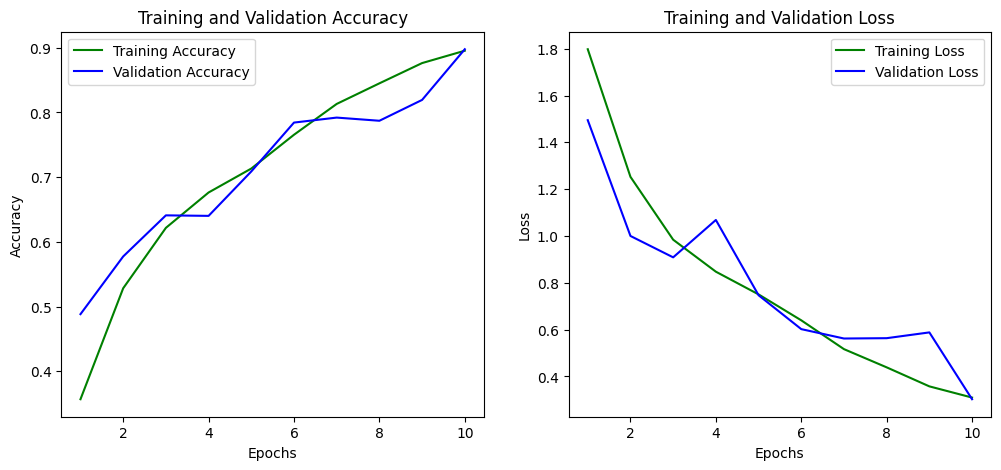

In [ ]:
acc_train = xception.history['accuracy']
acc_val = xception.history['val_accuracy']
loss_train = xception.history['loss']
loss_val = xception.history['val_loss']
epochs = range(1,11)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(epochs, acc_train, 'g', label='Training Accuracy')
plt.plot(epochs, acc_val, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(epochs, loss_train, 'g', label='Training Loss')
plt.plot(epochs, loss_val, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
results_df_2 = pd.DataFrame(data=[["Xception", (accuracy_xception*100)]], 
                          columns=['Model', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

Model  Testing Accuracy %
0     ResNet50           61.066562
1        VGG16           56.255013
2        VGG19           52.325583
3  DenseNet121           74.819565
4  DenseNet201           74.739373
5  InceptionV3           54.009622
6     Xception           90.417004

#### Using Custom CNN Model

In [ ]:
model=Sequential()

#convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(66,66,3)))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

#convolution layer
model.add(Conv2D(32,(3,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

#convolution layer
model.add(Conv2D(64,(3,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

#convolution layer
model.add(Conv2D(64,(3,3),activation='relu'))
#pooling layer
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization())

#global average pooling
model.add(GlobalAveragePooling2D())
#fully connected layer
model.add(Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(BatchNormalization())

#output layer
model.add(Dense(7, activation='softmax'))

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.002), 
                     loss = 'categorical_crossentropy', 
                     metrics = ['accuracy', 'Precision', 'Recall'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_34 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                     

In [ ]:
#Adding model check point callback
mc = ModelCheckpoint(
    filepath="./oc_custom_best_model.hdf5",
    verbose= 0,
    save_best_only= True
    )
call_back = [mc];

In [ ]:
#Fitting the model
custom = model.fit(
    train_data, 
    steps_per_epoch = len(train_data), 
    epochs = 20, 
    validation_data = val_data, 
    validation_steps = len(val_data),
    callbacks = call_back 
    )

Epoch 1/20
623/623 [==============================] - 54s 80ms/step - loss: 1.3859 - accuracy: 0.4786 - precision: 0.6532 - recall: 0.2566 - val_loss: 1.5071 - val_accuracy: 0.4462 - val_precision: 0.5427 - val_recall: 0.3394
Epoch 2/20
623/623 [==============================] - 48s 77ms/step - loss: 1.1439 - accuracy: 0.5642 - precision: 0.7015 - recall: 0.3887 - val_loss: 1.1434 - val_accuracy: 0.5643 - val_precision: 0.6641 - val_recall: 0.4177
Epoch 3/20
623/623 [==============================] - 48s 77ms/step - loss: 1.0471 - accuracy: 0.6028 - precision: 0.7186 - recall: 0.4531 - val_loss: 1.7066 - val_accuracy: 0.4502 - val_precision: 0.4951 - val_recall: 0.3687
Epoch 4/20
623/623 [==============================] - 49s 79ms/step - loss: 0.9855 - accuracy: 0.6205 - precision: 0.7283 - recall: 0.4908 - val_loss: 1.0438 - val_accuracy: 0.6000 - val_precision: 0.6850 - val_recall: 0.4900
Epoch 5/20
623/623 [==============================] - 50s 79ms/step - loss: 0.9318 - accuracy: 0

In [ ]:
#Loading the best fit model
custom_model = load_model("./oc_custom_best_model.hdf5")

In [ ]:
#Checking the accuracy, precision and recall of the model
accuracy_custom = custom_model.evaluate_generator(generator= test_data)[1]
precision_custom = custom_model.evaluate_generator(generator= test_data)[2]
recall_custom = custom_model.evaluate_generator(generator= test_data)[3]
print(f"Accuracy = {accuracy_custom*100} %")
print(f"Precision = {precision_custom*100} %")
print(f"Recall = {recall_custom*100} %")

<ipython-input-135-42bba74b5eb6>:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  accuracy_custom = custom_model.evaluate_generator(generator= test_data)[1]
<ipython-input-135-42bba74b5eb6>:3: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  precision_custom = custom_model.evaluate_generator(generator= test_data)[2]
<ipython-input-135-42bba74b5eb6>:4: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  recall_custom = custom_model.evaluate_generator(generator= test_data)[3]


Accuracy = 78.74899506568909 %
Precision = 83.42342376708984 %
Recall = 74.25822019577026 %


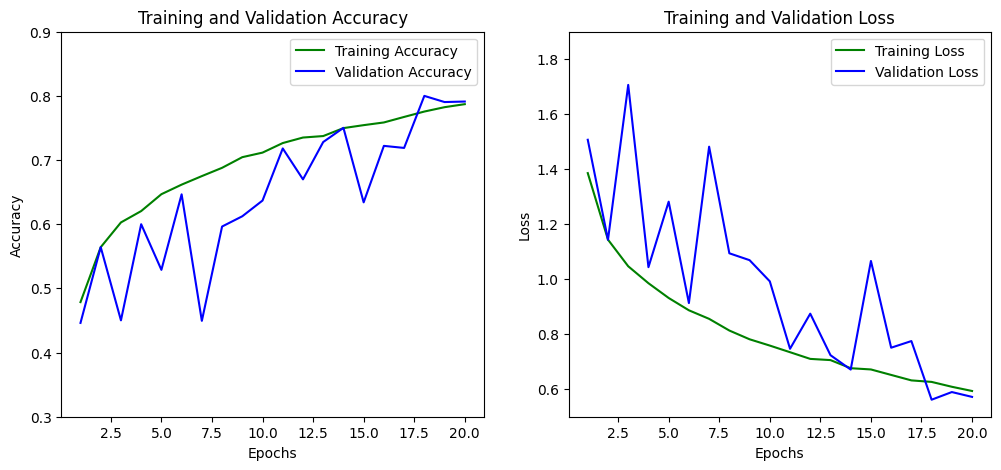

In [ ]:
acc_train = custom.history['accuracy']
acc_val = custom.history['val_accuracy']
loss_train = custom.history['loss']
loss_val = custom.history['val_loss']
epochs = range(1,21)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.ylim(0.3,0.9)
plt.plot(epochs, acc_train, 'g', label='Training Accuracy')
plt.plot(epochs, acc_val, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.ylim(0.5,1.9)
plt.plot(epochs, loss_train, 'g', label='Training Loss')
plt.plot(epochs, loss_val, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
results_df_2 = pd.DataFrame(data=[["Custom", (accuracy_custom*100)]], 
                          columns=['Model', 'Testing Accuracy %'])
results_df = pd.concat([results_df, results_df_2], ignore_index=True)
results_df

Model  Testing Accuracy %
0     ResNet50           61.066562
1        VGG16           56.255013
2        VGG19           52.325583
3  DenseNet121           74.819565
4  DenseNet201           74.739373
5  InceptionV3           54.009622
6     Xception           90.417004
7       Custom           78.748995

In [ ]:
models_test_acc = [accuracy_resnet, accuracy_vgg, accuracy_vgg19, accuracy_densenet121, accuracy_densenet, accuracy_incep, accuracy_xception, accuracy_custom]
accuracy_scores = []
for model in models_test_acc:
    accuracy_scores.append(model)
print(accuracy_scores)

[0.6106656193733215, 0.5625501275062561, 0.5232558250427246, 0.7481956481933594, 0.7473937273025513, 0.5400962233543396, 0.904170036315918, 0.7874899506568909]


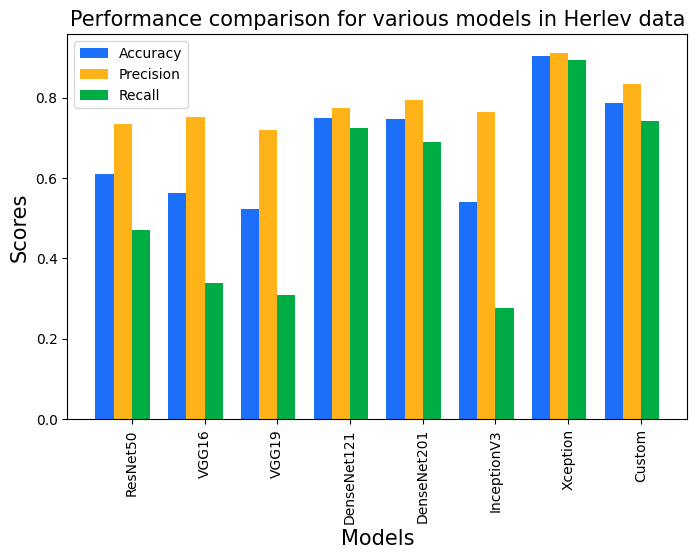

In [ ]:
ind = np.arange(8)
width = 0.25
fig, ax = plt.subplots(figsize=(8,5))

accu = [accuracy_resnet, accuracy_vgg, accuracy_vgg19, accuracy_densenet121, accuracy_densenet, accuracy_incep, accuracy_xception, accuracy_custom]
rects1 = ax.bar(ind, accu, width,color='#1c6ff8')
prec = [precision_resnet, precision_vgg, precision_vgg19, precision_densenet121, precision_densenet, precision_incep, precision_xception, precision_custom]
rects2 = ax.bar(ind+width, prec, width,color='#ffb318')
rec = [recall_resnet, recall_vgg, recall_vgg19, recall_densenet121, recall_densenet, recall_incep, recall_xception, recall_custom]
rects3 = ax.bar(ind + 2 * width, rec, width,color='#00ad44')

ax.set_xlabel('Models', fontsize=15)
ax.set_ylabel('Scores', fontsize=15)
ax.set_title('Performance comparison for various models in Herlev data', fontsize=15)
ax.set_xticks(ind + 1.5*width)
ax.set_xticklabels(('ResNet50','VGG16','VGG19','DenseNet121','DenseNet201','InceptionV3','Xception','Custom'))
ax.legend((rects1[0], rects2[0], rects3[0]), ('Accuracy', 'Precision', 'Recall'))
plt.xticks(rotation=90)
plt.show()

Inference: It is clear from the barplot that Xception model shows the highest performance followed by our own custom CNN model.